In [1]:
PROJECT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU"
CONFIG_PATH = f"{PROJECT_PATH}/config_ant.yaml"

In [2]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(PROJECT_PATH)
from utils.data import Dataset
import utils.figure as ufigure

In [3]:
Data = Dataset(PROJECT_PATH, CONFIG_PATH)
Data.load_data()

  0%|          | 0/141 [00:00<?, ?it/s]

Loading config.yaml ...
Finished loading config
Loading INFO.yaml ...
Finished loading INFO


100%|██████████| 141/141 [00:10<00:00, 13.43it/s]


In [4]:
INFO = Data.info
INFO_values = Data.info_values
config = Data.config

In [5]:
skeleton = config['skeleton']
skeleton_color = config['skeleton_color']

In [6]:
folders = []

for folder in INFO_values:
    folders.append(folder['directory'])

In [7]:
bp_data = {}

for folder in folders:
    bp_data[f"{folder.split('/')[2]}"] = np.load(f"{PROJECT_PATH}/{folder}/bodypoints.npy")

In [8]:
dist_dic = {}

'''
x_dic = {}
y_dic = {}

x1_dic = {}
y1_dic = {}
x2_dic = {}
y2_dic = {}
'''

for key,value in bp_data.items(): # loop through each dictionary element (bp data from each folder)
    
    #bp_axis = bp_data[key][:,config['bp_scale'],0:2]
    bp_axis = bp_data[key][:,1:3,0:3]

    bad_fr, bad_bp, bad_ax = np.where(np.isnan(bp_axis))
    unique_bad_fr = np.unique(bad_fr)
    # find the unique good fr
    good_idx = np.array([True]*len(bp_axis))
    good_idx[unique_bad_fr] = False
    
    # get rid of unlikely frames
    bad_liklihood_idx = np.unique(np.where(bp_axis[:,:,2] < 0.98)[0])
    good_idx[bad_liklihood_idx] = False
    
    good_bp_axis = bp_axis[good_idx,:,:]

    # find delta x and y
    x_d = good_bp_axis[:,0,0] - good_bp_axis[:,1,0]
    y_d = good_bp_axis[:,0,1] - good_bp_axis[:,1,1]
    
    '''
    x1 = good_bp_axis[:,0,0]
    y1 = good_bp_axis[:,0,1]
    x2 = good_bp_axis[:,1,0]
    y2 = good_bp_axis[:,1,1]
    '''
    
    # calc distance between bodypoints
    dist = np.sqrt(x_d**2+y_d**2)
    
    dist_dic[key] = dist
    
    '''
    x_dic[key] = x_d
    y_dic[key] = y_d
    
    x1_dic[key] = x1
    y1_dic[key] = y1
    x2_dic[key] = x2
    y2_dic[key] = y2
    '''

<ipython-input-8-d95a6f676913>:42: RuntimeWarning: overflow encountered in square
  dist = np.sqrt(x_d**2+y_d**2)
<ipython-input-8-d95a6f676913>:42: RuntimeWarning: overflow encountered in add
  dist = np.sqrt(x_d**2+y_d**2)


In [10]:
np.where(bp_axis[:,:,2] < 0.98)[0]

array([    0,     0,     1, ..., 15255, 15256, 15256])

In [102]:
for i,points in enumerate(good_bp_axis):
    print(i,points)

0 [[ 8.59 74.7   1.  ]
 [12.69 78.94  1.  ]]
1 [[ 8.59 74.7   1.  ]
 [12.69 78.94  1.  ]]
2 [[ 8.59 74.7   1.  ]
 [12.69 78.94  1.  ]]
3 [[ 8.59 74.7   1.  ]
 [12.69 78.94  1.  ]]
4 [[ 8.59 74.7   1.  ]
 [12.69 78.94  1.  ]]
5 [[ 8.59 74.7   1.  ]
 [12.69 78.94  1.  ]]
6 [[ 8.59 74.7   1.  ]
 [12.69 78.94  1.  ]]
7 [[ 8.59 74.7   1.  ]
 [12.69 78.94  1.  ]]
8 [[ 8.59 74.7   1.  ]
 [12.69 78.94  1.  ]]
9 [[ 8.7  74.7   1.  ]
 [12.69 78.94  1.  ]]
10 [[10.016 75.3    1.   ]
 [12.69  78.94   1.   ]]
11 [[10.29 75.4   1.  ]
 [12.69 78.94  1.  ]]
12 [[ 8.445 76.     1.   ]
 [12.69  78.94   1.   ]]
13 [[ 8.086 76.2    1.   ]
 [12.69  78.94   1.   ]]
14 [[ 9.31 73.75  1.  ]
 [12.69 78.94  1.  ]]
15 [[ 9.14 72.8   1.  ]
 [12.69 78.94  1.  ]]
16 [[ 8.9  58.72  1.  ]
 [12.69 78.94  1.  ]]
17 [[ 9.33 69.4   1.  ]
 [12.69 78.94  1.  ]]
18 [[ 9.53 75.3   1.  ]
 [11.11 77.4   1.  ]]
19 [[ 9.53 75.3   1.  ]
 [11.11 77.4   1.  ]]
20 [[ 9.53 75.3   1.  ]
 [11.11 77.4   1.  ]]
21 [[ 9.53 75.3   1.  ]
 [

 [70.75 74.25  1.  ]]
674 [[83.94 81.4   1.  ]
 [66.9  74.94  1.  ]]
675 [[87.06 76.25  1.  ]
 [70.7  69.06  1.  ]]
676 [[86.3  82.    1.  ]
 [69.06 75.75  1.  ]]
677 [[88.   79.75  1.  ]
 [71.1  71.4   1.  ]]
678 [[77.44 81.56  1.  ]
 [65.8  72.9   1.  ]]
679 [[86.6  81.94  1.  ]
 [69.56 74.9   1.  ]]
680 [[85.7  77.9   1.  ]
 [69.94 69.    1.  ]]
681 [[80.1 79.2  1. ]
 [69.  69.9  1. ]]
682 [[83.9  82.    1.  ]
 [69.3  70.44  1.  ]]
683 [[86.6  80.75  1.  ]
 [71.8  69.3   1.  ]]
684 [[85.9  82.56  1.  ]
 [71.6  76.1   1.  ]]
685 [[83.94 81.56  1.  ]
 [70.06 75.56  1.  ]]
686 [[82.   80.7   1.  ]
 [67.25 70.1   1.  ]]
687 [[82.94 82.25  1.  ]
 [70.3  75.1   1.  ]]
688 [[85.3  80.8   1.  ]
 [71.44 70.    1.  ]]
689 [[86.8 80.6  1. ]
 [73.2 71.1  1. ]]
690 [[80.9  77.75  1.  ]
 [67.7  67.3   1.  ]]
691 [[84.56 81.06  1.  ]
 [69.94 71.44  1.  ]]
692 [[85.5 81.4  1. ]
 [70.3 71.8  1. ]]
693 [[87.3  80.7   1.  ]
 [72.2  72.75  1.  ]]
694 [[80.1  80.3   1.  ]
 [65.44 72.25  1.  ]]
695 [[86.

 [55.97 78.9   1.  ]]
1141 [[41.94 68.5   1.  ]
 [59.84 79.7   1.  ]]
1142 [[43.25 66.8   1.  ]
 [57.7  76.5   1.  ]]
1143 [[40.28 70.4   1.  ]
 [54.56 77.7   1.  ]]
1144 [[37.12 71.8   1.  ]
 [51.25 78.94  1.  ]]
1145 [[32.72 67.2   1.  ]
 [51.2  78.44  1.  ]]
1146 [[35.28 68.5   1.  ]
 [49.7  78.4   1.  ]]
1147 [[34.8  68.06  1.  ]
 [49.22 78.56  1.  ]]
1148 [[33.12 68.94  1.  ]
 [46.94 78.94  1.  ]]
1149 [[31.39 70.2   1.  ]
 [43.16 80.6   1.  ]]
1150 [[27.73 66.44  1.  ]
 [40.34 75.2   1.  ]]
1151 [[28.86 66.94  1.  ]
 [44.56 80.56  1.  ]]
1152 [[27.7  68.56  1.  ]
 [41.28 78.9   1.  ]]
1153 [[27.55 66.94  1.  ]
 [41.38 76.7   1.  ]]
1154 [[30.16 69.5   1.  ]
 [41.3  82.7   1.  ]]
1155 [[27.66 68.7   1.  ]
 [44.47 80.94  1.  ]]
1156 [[29.42 67.1   1.  ]
 [44.1  81.06  1.  ]]
1157 [[29.05 66.94  1.  ]
 [43.44 79.3   1.  ]]
1158 [[28.69 67.9   1.  ]
 [42.6  79.44  1.  ]]
1159 [[27.1  64.9   1.  ]
 [42.16 78.4   1.  ]]
1160 [[27.38 65.2   1.  ]
 [42.12 78.2   1.  ]]
1161 [[27.16 67.06

 [76.6  68.44  1.  ]]
1659 [[83.1  86.2   1.  ]
 [75.94 69.75  1.  ]]
1660 [[84.06 91.06  1.  ]
 [76.75 75.56  1.  ]]
1661 [[81.75 83.9   1.  ]
 [75.5  68.2   1.  ]]
1662 [[83.44 84.94  1.  ]
 [75.75 69.06  1.  ]]
1663 [[83.44 84.75  1.  ]
 [74.94 70.06  1.  ]]
1664 [[85.   85.06  1.  ]
 [77.3  72.8   1.  ]]
1665 [[84.5  83.06  1.  ]
 [76.25 67.    1.  ]]
1666 [[85.06 83.75  1.  ]
 [76.94 67.94  1.  ]]
1667 [[85.25 84.    1.  ]
 [77.75 68.3   1.  ]]
1668 [[85.9  87.5   1.  ]
 [77.2  72.56  1.  ]]
1669 [[85.8  88.9   1.  ]
 [77.2  74.56  1.  ]]
1670 [[81.1  84.25  1.  ]
 [71.56 69.94  1.  ]]
1671 [[81.44 86.8   1.  ]
 [79.6  71.4   1.  ]]
1672 [[84.94 85.94  1.  ]
 [77.44 70.25  1.  ]]
1673 [[81.2  83.5   1.  ]
 [76.94 67.2   1.  ]]
1674 [[83.3  87.75  1.  ]
 [78.56 71.44  1.  ]]
1675 [[81.25 90.25  1.  ]
 [78.1  74.75  1.  ]]
1676 [[82.3  83.25  1.  ]
 [75.2  68.25  1.  ]]
1677 [[82.5  83.3   1.  ]
 [75.44 69.5   1.  ]]
1678 [[80.56 80.06  1.  ]
 [73.75 65.9   1.  ]]
1679 [[82.2  84.94

 [ 68.5  113.44   1.  ]]
2209 [[ 91.  123.2   1. ]
 [ 73.  115.8   1. ]]
2210 [[ 87.75 125.06   1.  ]
 [ 70.   117.9    1.  ]]
2211 [[ 89.56 123.6    1.  ]
 [ 72.1  118.3    1.  ]]
2212 [[ 84.56 122.1    1.  ]
 [ 67.   117.94   1.  ]]
2213 [[ 84.25 121.75   1.  ]
 [ 67.2  118.8    1.  ]]
2214 [[ 84.94 123.9    1.  ]
 [ 67.4  118.75   1.  ]]
2215 [[ 88.1 120.2   1. ]
 [ 69.2 115.9   1. ]]
2216 [[ 86.9  119.2    1.  ]
 [ 67.94 116.3    1.  ]]
2217 [[ 82.7 116.    1. ]
 [ 68.3 114.5   1. ]]
2218 [[ 83.7  116.2    1.  ]
 [ 68.06 113.25   1.  ]]
2219 [[ 87.56 116.06   1.  ]
 [ 70.06 113.8    1.  ]]
2220 [[ 89.3 115.    1. ]
 [ 71.8 116.4   1. ]]
2221 [[ 85.4  115.6    1.  ]
 [ 69.75 117.8    1.  ]]
2222 [[ 87.56 114.5    1.  ]
 [ 71.8  115.94   1.  ]]
2223 [[ 93.4  110.3    1.  ]
 [ 76.3  110.75   1.  ]]
2224 [[ 84.25 110.44   1.  ]
 [ 66.94 107.6    1.  ]]
2225 [[ 89.44 108.94   1.  ]
 [ 70.4  106.9    1.  ]]
2226 [[ 88.6 110.3   1. ]
 [ 74.6 105.9   1. ]]
2227 [[ 85.06 111.06   1.  ]
 [ 6

 [70.75 79.56  1.  ]]
2774 [[84.7  73.25  1.  ]
 [68.75 81.94  1.  ]]
2775 [[88.44 66.5   1.  ]
 [71.75 74.2   1.  ]]
2776 [[87.7  69.25  1.  ]
 [70.4  76.56  1.  ]]
2777 [[88.1 68.7  1. ]
 [72.8 76.7  1. ]]
2778 [[88.   72.25  1.  ]
 [72.94 80.75  1.  ]]
2779 [[85.1  70.06  1.  ]
 [69.94 79.5   1.  ]]
2780 [[85.7 71.9  1. ]
 [69.1 80.5  1. ]]
2781 [[87.1  71.4   1.  ]
 [69.44 79.06  1.  ]]
2782 [[91.   69.75  1.  ]
 [71.44 77.06  1.  ]]
2783 [[88.6  71.06  1.  ]
 [70.75 77.8   1.  ]]
2784 [[81.   72.1   1.  ]
 [64.4  79.25  1.  ]]
2785 [[84.8  69.94  1.  ]
 [67.75 78.    1.  ]]
2786 [[87.5  69.    1.  ]
 [70.25 77.06  1.  ]]
2787 [[85.06 69.9   1.  ]
 [67.3  78.25  1.  ]]
2788 [[87.6 72.   1. ]
 [70.3 78.5  1. ]]
2789 [[86.9 73.5  1. ]
 [70.6 81.3  1. ]]
2790 [[90.56 73.1   1.  ]
 [74.56 78.4   1.  ]]
2791 [[89.4  72.56  1.  ]
 [72.7  78.5   1.  ]]
2792 [[89.25 71.44  1.  ]
 [71.3  77.06  1.  ]]
2793 [[90.44 71.4   1.  ]
 [71.   76.94  1.  ]]
2794 [[87.6  71.25  1.  ]
 [70.4  81.    1

 [ 75.56  94.9    1.  ]]
3288 [[ 81.44 113.44   1.  ]
 [ 75.5   95.7    1.  ]]
3289 [[ 80.56 113.8    1.  ]
 [ 74.    97.56   1.  ]]
3290 [[ 80.06 114.1    1.  ]
 [ 73.75  99.8    1.  ]]
3291 [[ 80.   113.25   1.  ]
 [ 73.75 101.5    1.  ]]
3292 [[ 83.5  118.     1.  ]
 [ 73.8  101.56   1.  ]]
3293 [[ 83.1 119.2   1. ]
 [ 73.7 105.3   1. ]]
3294 [[ 82.7  119.56   1.  ]
 [ 73.4  107.94   1.  ]]
3295 [[ 83.4 125.9   1. ]
 [ 73.2 108.6   1. ]]
3296 [[ 80.06 125.75   1.  ]
 [ 73.   110.25   1.  ]]
3297 [[ 79.6 125.4   1. ]
 [ 71.5 111.5   1. ]]
3298 [[ 80.1 127.4   1. ]
 [ 72.1 111.8   1. ]]
3299 [[ 81.   128.1    1.  ]
 [ 71.8  115.44   1.  ]]
3300 [[ 79.75 128.9    1.  ]
 [ 70.75 116.7    1.  ]]
3301 [[ 84.3  131.6    1.  ]
 [ 72.2  118.25   1.  ]]
3302 [[ 83.9  133.     1.  ]
 [ 71.7  120.94   1.  ]]
3303 [[ 84.2  133.2    1.  ]
 [ 71.1  122.56   1.  ]]
3304 [[ 84.56 133.9    1.  ]
 [ 70.94 124.06   1.  ]]
3305 [[ 85.3  133.9    1.  ]
 [ 69.44 125.1    1.  ]]
3306 [[ 83.9 135.4   1. ]
 

3829 [[ 61.  137.    1. ]
 [ 83.6 142.1   1. ]]
3830 [[ 61.1 138.4   1. ]
 [ 84.  142.9   1. ]]
3831 [[ 62.47 139.6    1.  ]
 [ 85.   142.8    1.  ]]
3832 [[ 62.12 140.5    1.  ]
 [ 85.1  143.8    1.  ]]
3833 [[ 62.97 140.5    1.  ]
 [ 86.25 144.1    1.  ]]
3834 [[ 58.66 156.6    1.  ]
 [ 83.44 149.6    1.  ]]
3835 [[ 58.75 156.4    1.  ]
 [ 83.7  149.8    1.  ]]
3836 [[ 58.8 156.1   1. ]
 [ 84.  149.9   1. ]]
3837 [[ 58.9  155.9    1.  ]
 [ 84.25 150.     1.  ]]
3838 [[ 58.97 155.6    1.  ]
 [ 84.56 150.1    1.  ]]
3839 [[ 59.06 155.4    1.  ]
 [ 84.8  150.2    1.  ]]
3840 [[ 59.12 155.2    1.  ]
 [ 85.1  150.4    1.  ]]
3841 [[ 59.22 155.     1.  ]
 [ 85.4  150.5    1.  ]]
3842 [[ 59.28 154.8    1.  ]
 [ 85.7  150.6    1.  ]]
3843 [[ 63.7  136.4    1.  ]
 [ 85.44 143.1    1.  ]]
3844 [[ 64.7 133.    1. ]
 [ 86.  136.8   1. ]]
3845 [[ 64.  134.5   1. ]
 [ 86.  137.5   1. ]]
3846 [[ 64.06 135.1    1.  ]
 [ 86.5  138.1    1.  ]]
3847 [[ 61.9 136.8   1. ]
 [ 84.2 138.1   1. ]]
3848 [[ 60

 [73.8  79.6   1.  ]]
4421 [[67.75 63.62  1.  ]
 [73.94 78.25  1.  ]]
4422 [[70.5  65.75  1.  ]
 [76.5  80.06  1.  ]]
4423 [[67.4  64.44  1.  ]
 [74.06 80.1   1.  ]]
4424 [[71.2 66.8  1. ]
 [77.5 80.9  1. ]]
4425 [[70.25 65.3   1.  ]
 [77.   79.9   1.  ]]
4426 [[71.6 67.6  1. ]
 [77.8 82.   1. ]]
4427 [[71.   67.9   1.  ]
 [76.94 82.75  1.  ]]
4428 [[70.1  67.8   1.  ]
 [75.75 83.2   1.  ]]
4429 [[72.8 68.6  1. ]
 [77.5 83.   1. ]]
4430 [[69.8  66.06  1.  ]
 [77.56 81.56  1.  ]]
4431 [[70.1 68.3  1. ]
 [76.3 83.6  1. ]]
4432 [[69.2  69.3   1.  ]
 [76.6  83.75  1.  ]]
4433 [[72.44 73.9   1.  ]
 [82.   85.75  1.  ]]
4434 [[70.9 74.9  1. ]
 [81.5 86.4  1. ]]
4435 [[71.5  72.44  1.  ]
 [78.3  85.2   1.  ]]
4436 [[69.94 71.7   1.  ]
 [79.6  83.44  1.  ]]
4437 [[71.06 71.75  1.  ]
 [78.1  84.3   1.  ]]
4438 [[71.4 73.1  1. ]
 [80.1 84.7  1. ]]
4439 [[71.5  72.56  1.  ]
 [80.3  84.7   1.  ]]
4440 [[69.56 65.1   1.  ]
 [76.56 83.1   1.  ]]
4441 [[70.6 67.3  1. ]
 [76.9 84.   1. ]]
4442 [[70.8 

 [81.9  80.4   1.  ]]
4981 [[68.6  70.06  1.  ]
 [80.4  84.75  1.  ]]
4982 [[68.94 64.9   1.  ]
 [80.9  80.94  1.  ]]
4983 [[66.8  64.6   1.  ]
 [77.2  79.75  1.  ]]
4984 [[67.4  69.    1.  ]
 [77.56 85.1   1.  ]]
4985 [[69.8  69.06  1.  ]
 [78.94 83.7   1.  ]]
4986 [[68.44 65.44  1.  ]
 [78.44 80.5   1.  ]]
4987 [[67.56 66.94  1.  ]
 [80.06 81.06  1.  ]]
4988 [[68.25 65.25  1.  ]
 [79.3  82.    1.  ]]
4989 [[66.8  63.84  1.  ]
 [77.2  78.7   1.  ]]
4990 [[68.6 66.8  1. ]
 [79.1 82.7  1. ]]
4991 [[66.06 63.8   1.  ]
 [76.2  77.5   1.  ]]
4992 [[64.44 64.7   1.  ]
 [72.56 79.94  1.  ]]
4993 [[67.94 70.25  1.  ]
 [78.1  81.25  1.  ]]
4994 [[72.44 68.44  1.  ]
 [79.6  84.25  1.  ]]
4995 [[69.7  65.06  1.  ]
 [79.7  82.75  1.  ]]
4996 [[71.2  68.2   1.  ]
 [79.1  84.44  1.  ]]
4997 [[68.7  69.06  1.  ]
 [77.8  86.4   1.  ]]
4998 [[66.9  64.3   1.  ]
 [76.6  81.44  1.  ]]
4999 [[68.44 64.3   1.  ]
 [77.7  79.3   1.  ]]
5000 [[68.5  68.06  1.  ]
 [76.9  83.25  1.  ]]
5001 [[68.8  66.75  1.  

 [69.2 74.6  1. ]]
5499 [[90.8  73.    1.  ]
 [74.56 76.5   1.  ]]
5500 [[90.9  76.1   1.  ]
 [72.4  76.25  1.  ]]
5501 [[91.3 77.4  1. ]
 [71.3 75.7  1. ]]
5502 [[86.75 77.3   1.  ]
 [66.06 77.4   1.  ]]
5503 [[86.44 73.06  1.  ]
 [66.6  78.5   1.  ]]
5504 [[91.   76.7   1.  ]
 [70.75 75.6   1.  ]]
5505 [[85.5 74.2  1. ]
 [66.8 77.2  1. ]]
5506 [[92.44 73.5   1.  ]
 [69.75 75.9   1.  ]]
5507 [[93.4  76.06  1.  ]
 [70.7  76.9   1.  ]]
5508 [[88.8  78.8   1.  ]
 [71.44 78.44  1.  ]]
5509 [[91.94 76.1   1.  ]
 [72.1  74.3   1.  ]]
5510 [[92.7  77.5   1.  ]
 [72.06 75.75  1.  ]]
5511 [[89.7  74.3   1.  ]
 [69.6  74.44  1.  ]]
5512 [[87.7  75.75  1.  ]
 [67.9  77.5   1.  ]]
5513 [[91.   77.44  1.  ]
 [70.9  77.25  1.  ]]
5514 [[92.4 75.4  1. ]
 [72.3 76.9  1. ]]
5515 [[87.2 76.1  1. ]
 [67.6 77.8  1. ]]
5516 [[89.9  75.06  1.  ]
 [69.75 76.9   1.  ]]
5517 [[91.2  74.7   1.  ]
 [72.94 78.2   1.  ]]
5518 [[84.4 74.2  1. ]
 [67.  78.5  1. ]]
5519 [[84.4 74.9  1. ]
 [69.1 81.5  1. ]]
5520 [[86

 [81.4  43.72  1.  ]]
6033 [[62.66 36.2   1.  ]
 [81.1  44.62  1.  ]]
6034 [[62.1  35.22  1.  ]
 [79.56 44.5   1.  ]]
6035 [[66.9  37.34  1.  ]
 [83.56 43.3   1.  ]]
6036 [[63.8  35.8   1.  ]
 [83.4  40.16  1.  ]]
6037 [[64.44 34.72  1.  ]
 [79.75 41.84  1.  ]]
6038 [[63.5  34.72  1.  ]
 [81.4  40.34  1.  ]]
6039 [[65.5  32.8   1.  ]
 [81.   39.16  1.  ]]
6040 [[66.2  32.8   1.  ]
 [80.25 39.16  1.  ]]
6041 [[65.94 33.03  1.  ]
 [84.6  37.97  1.  ]]
6042 [[63.72 32.4   1.  ]
 [82.9  37.12  1.  ]]
6043 [[66.56 33.22  1.  ]
 [84.3  37.9   1.  ]]
6044 [[67.44 35.12  1.  ]
 [83.94 39.66  1.  ]]
6045 [[64.8  36.62  1.  ]
 [83.5  40.66  1.  ]]
6046 [[66.1 39.2  1. ]
 [84.4 40.9  1. ]]
6047 [[63.44 42.53  1.  ]
 [81.75 42.16  1.  ]]
6048 [[64.1  42.7   1.  ]
 [83.06 43.22  1.  ]]
6049 [[61.34 42.47  1.  ]
 [81.7  44.    1.  ]]
6050 [[65.06 42.22  1.  ]
 [85.2  40.8   1.  ]]
6051 [[66.9  43.78  1.  ]
 [85.56 43.28  1.  ]]
6052 [[65.94 42.6   1.  ]
 [83.6  42.84  1.  ]]
6053 [[65.06 46.22  1.  

6578 [[70.75 46.7   1.  ]
 [89.2  46.84  1.  ]]
6579 [[64.56 42.75  1.  ]
 [84.25 44.34  1.  ]]
6580 [[66.1  41.28  1.  ]
 [84.2  43.94  1.  ]]
6581 [[66.2  42.56  1.  ]
 [84.9  43.9   1.  ]]
6582 [[64.25 43.2   1.  ]
 [82.25 44.56  1.  ]]
6583 [[65.25 42.94  1.  ]
 [83.44 45.3   1.  ]]
6584 [[61.06 40.53  1.  ]
 [79.94 44.28  1.  ]]
6585 [[63.5  39.6   1.  ]
 [81.8  44.94  1.  ]]
6586 [[66.5  39.53  1.  ]
 [81.94 45.6   1.  ]]
6587 [[65.7  38.56  1.  ]
 [83.3  42.62  1.  ]]
6588 [[65.2  37.5   1.  ]
 [83.56 42.2   1.  ]]
6589 [[66.4  35.28  1.  ]
 [84.   41.75  1.  ]]
6590 [[67.   35.16  1.  ]
 [84.56 41.    1.  ]]
6591 [[64.7 36.3  1. ]
 [84.  39.2  1. ]]
6592 [[63.53 37.28  1.  ]
 [82.8  39.56  1.  ]]
6593 [[60.16 33.5   1.  ]
 [79.7  39.16  1.  ]]
6594 [[62.78 35.7   1.  ]
 [83.06 38.22  1.  ]]
6595 [[62.03 35.03  1.  ]
 [82.75 37.3   1.  ]]
6596 [[66.56 36.94  1.  ]
 [86.56 38.25  1.  ]]
6597 [[66.4  38.28  1.  ]
 [84.8  39.    1.  ]]
6598 [[65.7  42.62  1.  ]
 [86.6  42.9   1.  ]

 [66.06 68.5   1.  ]]
7166 [[68.8  83.94  1.  ]
 [68.1  62.8   1.  ]]
7167 [[74.75 89.5   1.  ]
 [66.25 73.9   1.  ]]
7168 [[78.2 86.7  1. ]
 [67.4 74.2  1. ]]
7169 [[76.8  83.25  1.  ]
 [67.4  69.7   1.  ]]
7170 [[78.6  84.8   1.  ]
 [68.56 71.44  1.  ]]
7171 [[79.8  86.7   1.  ]
 [69.44 68.56  1.  ]]
7172 [[79.4  85.6   1.  ]
 [70.7  67.06  1.  ]]
7173 [[79.6  86.9   1.  ]
 [70.25 69.56  1.  ]]
7174 [[80.56 85.56  1.  ]
 [70.3  72.3   1.  ]]
7175 [[81.2  86.25  1.  ]
 [71.6  72.6   1.  ]]
7176 [[77.4 83.   1. ]
 [67.6 71.   1. ]]
7177 [[80.2  84.75  1.  ]
 [70.25 67.5   1.  ]]
7178 [[81.44 84.3   1.  ]
 [69.44 71.1   1.  ]]
7179 [[85.06 84.6   1.  ]
 [72.56 72.06  1.  ]]
7180 [[82.8  83.75  1.  ]
 [74.6  69.1   1.  ]]
7181 [[81.94 84.06  1.  ]
 [75.7  69.1   1.  ]]
7182 [[82.75 86.56  1.  ]
 [75.5  70.    1.  ]]
7183 [[79.5 85.7  1. ]
 [69.7 69.1  1. ]]
7184 [[85.9 89.7  1. ]
 [73.  75.9  1. ]]
7185 [[80.5 84.4  1. ]
 [71.4 68.4  1. ]]
7186 [[82.06 84.7   1.  ]
 [75.3  67.9   1.  ]]


 [72.7  80.7   1.  ]]
7743 [[80.75 65.44  1.  ]
 [74.2  80.2   1.  ]]
7744 [[80.  64.8  1. ]
 [74.6 83.6  1. ]]
7745 [[79.75 65.2   1.  ]
 [71.2  81.8   1.  ]]
7746 [[83.75 60.25  1.  ]
 [73.3  77.1   1.  ]]
7747 [[83.8  71.06  1.  ]
 [69.8  83.4   1.  ]]
7748 [[80.5  65.44  1.  ]
 [70.56 81.5   1.  ]]
7749 [[81.8  67.44  1.  ]
 [73.2  85.06  1.  ]]
7750 [[77.   69.25  1.  ]
 [73.6  88.06  1.  ]]
7751 [[80.8  68.44  1.  ]
 [73.8  83.6   1.  ]]
7752 [[80.   68.6   1.  ]
 [73.5  86.06  1.  ]]
7753 [[85.6  66.06  1.  ]
 [77.6  81.9   1.  ]]
7754 [[81.75 69.44  1.  ]
 [73.2  87.06  1.  ]]
7755 [[81.44 68.44  1.  ]
 [73.8  84.6   1.  ]]
7756 [[82.   65.25  1.  ]
 [76.9  81.75  1.  ]]
7757 [[81.9 64.1  1. ]
 [76.9 79.6  1. ]]
7758 [[80.3  64.6   1.  ]
 [75.2  79.25  1.  ]]
7759 [[78.75 68.56  1.  ]
 [72.5  85.56  1.  ]]
7760 [[83.75 64.5   1.  ]
 [77.   81.7   1.  ]]
7761 [[78.5  72.7   1.  ]
 [69.06 91.5   1.  ]]
7762 [[76.1 69.   1. ]
 [70.  89.5  1. ]]
7763 [[79.7  68.25  1.  ]
 [71.9  85

 [72.94 77.56  1.  ]]
8221 [[89.3  68.25  1.  ]
 [70.9  76.    1.  ]]
8222 [[90.4  77.25  1.  ]
 [70.75 79.25  1.  ]]
8223 [[89.25 76.6   1.  ]
 [71.2  78.6   1.  ]]
8224 [[85.9  75.4   1.  ]
 [67.8  77.25  1.  ]]
8225 [[90.75 75.94  1.  ]
 [70.8  77.8   1.  ]]
8226 [[84.7  78.1   1.  ]
 [66.44 80.44  1.  ]]
8227 [[86.06 73.8   1.  ]
 [68.3  74.8   1.  ]]
8228 [[88.1  75.44  1.  ]
 [70.44 76.6   1.  ]]
8229 [[84.7  75.6   1.  ]
 [68.4  78.06  1.  ]]
8230 [[85.94 74.9   1.  ]
 [68.94 75.1   1.  ]]
8231 [[86.7 75.8  1. ]
 [66.3 80.8  1. ]]
8232 [[89.6 78.5  1. ]
 [69.9 79.3  1. ]]
8233 [[83.75 72.75  1.  ]
 [63.7  77.56  1.  ]]
8234 [[93.75 77.4   1.  ]
 [74.94 76.6   1.  ]]
8235 [[91.44 76.6   1.  ]
 [71.25 74.5   1.  ]]
8236 [[85.1 75.9  1. ]
 [67.3 73.4  1. ]]
8237 [[85.6  76.25  1.  ]
 [67.75 76.3   1.  ]]
8238 [[88.4  77.9   1.  ]
 [68.75 75.56  1.  ]]
8239 [[83.7  73.56  1.  ]
 [66.6  72.7   1.  ]]
8240 [[91.56 78.56  1.  ]
 [72.44 79.06  1.  ]]
8241 [[91.  78.6  1. ]
 [71.5 77.8  

 [69.25 39.66  1.  ]]
8781 [[87.1  34.3   1.  ]
 [70.06 39.25  1.  ]]
8782 [[86.3  33.03  1.  ]
 [69.4  38.66  1.  ]]
8783 [[85.3 34.   1. ]
 [69.1 36.7  1. ]]
8784 [[81.7  34.44  1.  ]
 [68.7  35.62  1.  ]]
8785 [[89.9  36.7   1.  ]
 [71.5  36.28  1.  ]]
8786 [[84.94 32.94  1.  ]
 [72.75 35.53  1.  ]]
8787 [[84.   35.84  1.  ]
 [64.44 35.66  1.  ]]
8788 [[81.5  34.94  1.  ]
 [67.7  36.5   1.  ]]
8789 [[88.3  33.72  1.  ]
 [69.75 35.03  1.  ]]
8790 [[82.75 33.    1.  ]
 [67.8  35.47  1.  ]]
8791 [[85.75 33.06  1.  ]
 [67.9  35.1   1.  ]]
8792 [[85.3  31.05  1.  ]
 [70.44 32.84  1.  ]]
8793 [[88.44 30.03  1.  ]
 [74.1  32.03  1.  ]]
8794 [[88.3  28.67  1.  ]
 [73.56 30.25  1.  ]]
8795 [[83.4  26.17  1.  ]
 [67.25 29.72  1.  ]]
8796 [[85.94 26.83  1.  ]
 [69.   29.    1.  ]]
8797 [[85.94 27.9   1.  ]
 [67.44 30.84  1.  ]]
8798 [[88.   28.39  1.  ]
 [68.1  31.44  1.  ]]
8799 [[87.75 29.98  1.  ]
 [66.9  32.56  1.  ]]
8800 [[90.4  31.83  1.  ]
 [69.5  33.94  1.  ]]
8801 [[82.1  33.03  1.  

 [70.2  57.38  1.  ]]
9295 [[86.3  67.9   1.  ]
 [74.7  59.84  1.  ]]
9296 [[84.44 71.3   1.  ]
 [70.75 58.72  1.  ]]
9297 [[85.25 73.4   1.  ]
 [72.56 60.78  1.  ]]
9298 [[82.9  74.5   1.  ]
 [69.75 64.6   1.  ]]
9299 [[85.8  77.5   1.  ]
 [70.4  66.56  1.  ]]
9300 [[86.9  78.44  1.  ]
 [72.5  66.5   1.  ]]
9301 [[83.1  79.9   1.  ]
 [70.1  69.06  1.  ]]
9302 [[81.06 80.    1.  ]
 [67.56 70.9   1.  ]]
9303 [[84.8 81.6  1. ]
 [70.1 73.1  1. ]]
9304 [[85.1  81.8   1.  ]
 [71.4  72.44  1.  ]]
9305 [[78.94 81.25  1.  ]
 [67.4  70.2   1.  ]]
9306 [[86.  83.7  1. ]
 [72.9 71.5  1. ]]
9307 [[81.3  84.1   1.  ]
 [67.44 71.75  1.  ]]
9308 [[82.44 81.7   1.  ]
 [73.2  70.6   1.  ]]
9309 [[79.7  82.1   1.  ]
 [69.25 69.5   1.  ]]
9310 [[81.   82.1   1.  ]
 [70.7  70.94  1.  ]]
9311 [[81.94 82.6   1.  ]
 [70.5  72.56  1.  ]]
9312 [[82.8  82.44  1.  ]
 [72.1  71.7   1.  ]]
9313 [[81.06 81.6   1.  ]
 [71.   66.44  1.  ]]
9314 [[82.44 82.56  1.  ]
 [71.9  69.3   1.  ]]
9315 [[81.   84.06  1.  ]
 [71

 [86.44 62.62  1.  ]]
9797 [[82.94 84.06  1.  ]
 [85.2  64.4   1.  ]]
9798 [[84.2  79.9   1.  ]
 [85.   63.84  1.  ]]
9799 [[84.06 78.56  1.  ]
 [85.25 68.75  1.  ]]
9800 [[84.5 79.1  1. ]
 [85.  68.   1. ]]
9801 [[83.7  83.94  1.  ]
 [83.7  64.4   1.  ]]
9802 [[86.44 85.4   1.  ]
 [84.44 67.3   1.  ]]
9803 [[85.5  80.25  1.  ]
 [85.1  64.3   1.  ]]
9804 [[92.2  85.1   1.  ]
 [93.25 66.25  1.  ]]
9805 [[92.06 84.6   1.  ]
 [90.7  64.8   1.  ]]
9806 [[91.56 85.    1.  ]
 [92.94 64.7   1.  ]]
9807 [[93.1  85.    1.  ]
 [90.06 64.3   1.  ]]
9808 [[94.44 87.5   1.  ]
 [95.5  67.75  1.  ]]
9809 [[93.44 78.25  1.  ]
 [94.6  67.7   1.  ]]
9810 [[94.2 85.1  1. ]
 [95.3 68.9  1. ]]
9811 [[111.6  82.9   1. ]
 [107.8  67.1   1. ]]
9812 [[115.75  80.56   1.  ]
 [114.06  68.94   1.  ]]
9813 [[118.8   82.5    1.  ]
 [115.75  68.8    1.  ]]
9814 [[124.4   83.1    1.  ]
 [116.9   68.75   1.  ]]
9815 [[124.94  80.8    1.  ]
 [125.2   66.8    1.  ]]
9816 [[125.56  84.8    1.  ]
 [125.3   68.7    1.  ]]


10335 [[100.7 135.    1. ]
 [110.1 140.6   1. ]]
10336 [[100.75 134.6    1.  ]
 [110.8  141.9    1.  ]]
10337 [[100.9  134.4    1.  ]
 [111.56 143.     1.  ]]
10338 [[100.94 134.     1.  ]
 [112.25 144.2    1.  ]]
10339 [[101.06 133.6    1.  ]
 [113.   145.4    1.  ]]
10340 [[101.1 133.2   1. ]
 [113.7 146.6   1. ]]
10341 [[101.25 132.9    1.  ]
 [114.44 147.9    1.  ]]
10342 [[101.3 132.6   1. ]
 [115.2 149.    1. ]]
10343 [[101.4 132.2   1. ]
 [115.9 150.2   1. ]]
10344 [[101.5 131.9   1. ]
 [116.6 151.4   1. ]]
10345 [[101.56 131.5    1.  ]
 [117.3  152.6    1.  ]]
10346 [[101.7  131.1    1.  ]
 [118.06 153.8    1.  ]]
10347 [[101.75 130.9    1.  ]
 [118.8  155.     1.  ]]
10348 [[101.9 130.5   1. ]
 [119.5 156.1   1. ]]
10349 [[101.94 130.1    1.  ]
 [120.25 157.4    1.  ]]
10350 [[102.   129.8    1.  ]
 [120.94 158.6    1.  ]]
10351 [[102.1 129.5   1. ]
 [121.7 159.8   1. ]]
10352 [[102.2  129.1    1.  ]
 [122.44 161.     1.  ]]
10353 [[102.3 128.8   1. ]
 [123.1 162.1   1. ]]
103

11076 [[63.1  73.8   1.  ]
 [82.06 77.5   1.  ]]
11077 [[65.   73.06  1.  ]
 [83.6  77.9   1.  ]]
11078 [[63.4  73.8   1.  ]
 [81.75 77.    1.  ]]
11079 [[64.5  74.06  1.  ]
 [82.3  77.1   1.  ]]
11080 [[63.9  74.    1.  ]
 [82.8  76.94  1.  ]]
11081 [[64.1 73.7  1. ]
 [82.2 77.2  1. ]]
11082 [[64.4  73.56  1.  ]
 [82.8  77.3   1.  ]]
11083 [[64.8  73.75  1.  ]
 [82.8  76.9   1.  ]]
11084 [[64.9 72.7  1. ]
 [82.1 75.6  1. ]]
11085 [[64.75 73.25  1.  ]
 [82.7  77.3   1.  ]]
11086 [[65.75 73.7   1.  ]
 [84.06 77.2   1.  ]]
11087 [[65.   73.7   1.  ]
 [83.25 76.6   1.  ]]
11088 [[66.   72.7   1.  ]
 [84.2  77.06  1.  ]]
11089 [[64.94 74.5   1.  ]
 [83.2  77.06  1.  ]]
11090 [[66.   73.8   1.  ]
 [82.6  76.94  1.  ]]
11091 [[66.6  73.8   1.  ]
 [84.44 76.1   1.  ]]
11092 [[66.06 73.25  1.  ]
 [83.44 76.9   1.  ]]
11093 [[64.9  73.4   1.  ]
 [82.3  76.56  1.  ]]
11094 [[66.4 72.2  1. ]
 [84.4 77.9  1. ]]
11095 [[65.5  73.3   1.  ]
 [83.44 76.6   1.  ]]
11096 [[65.  74.1  1. ]
 [83.  77.   1

In [11]:
def plot_scale_distribution(video_file):
    fig,ax = plt.subplots(figsize=(8,4))

    # take out inf distance values
    bad_dist = np.where(np.isinf(dist_dic[video_file]))
    unique_bad_dist = np.unique(bad_dist)

    good_idx = np.array([True]*len(dist_dic[video_file]))
    good_idx[unique_bad_dist] = False
    good_dist = dist_dic[video_file][good_idx]

    sns.histplot(good_dist)
    
    plt.title(key)
    plt.xlabel("Scale Factor")

    plt.show()

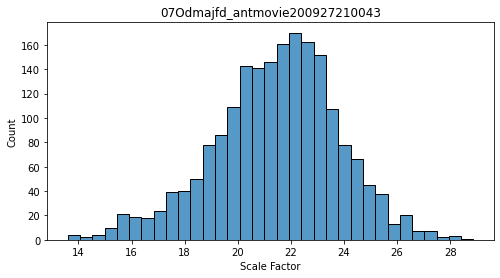

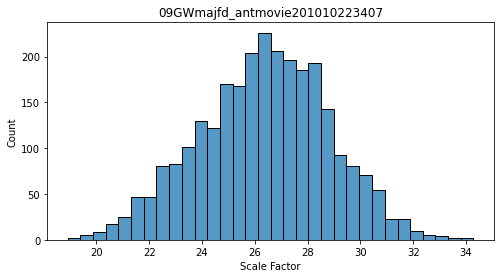

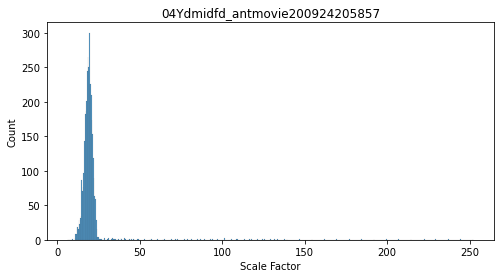

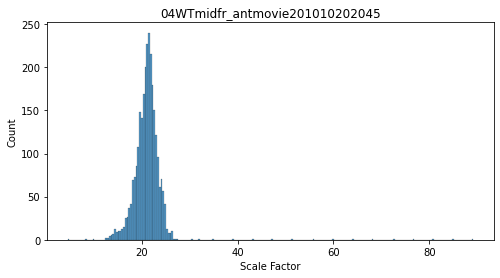

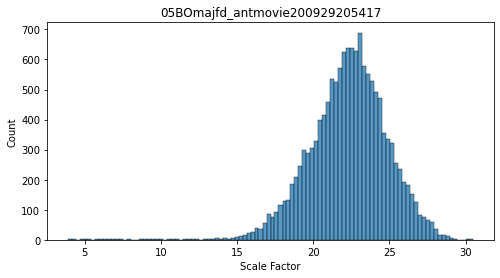

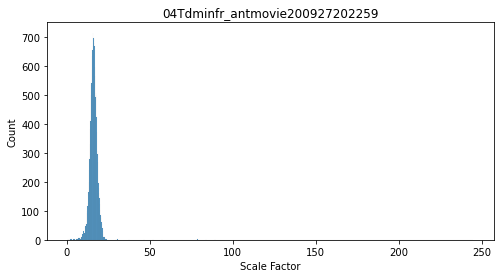

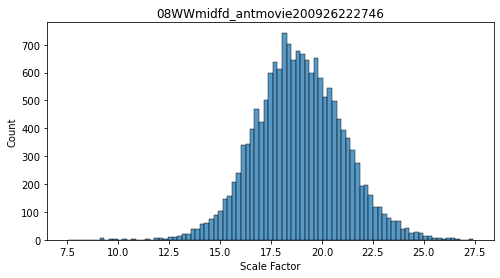

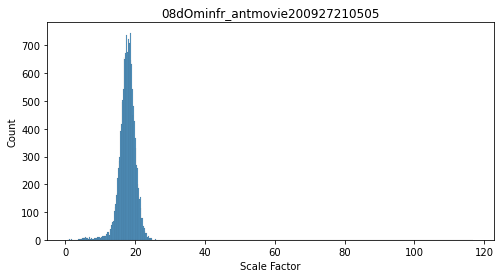

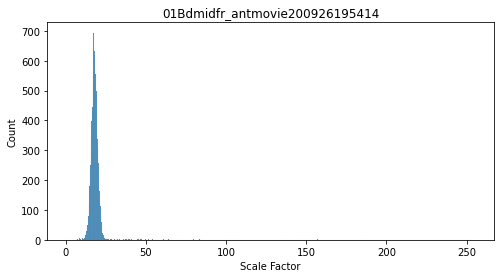

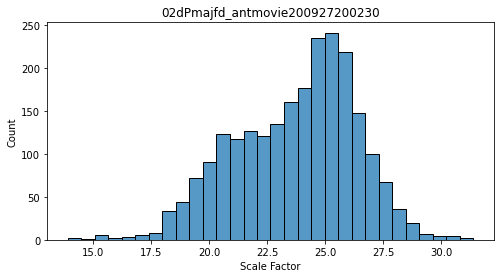

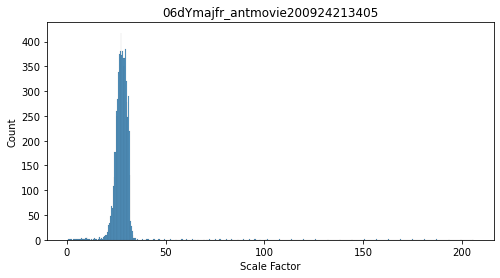

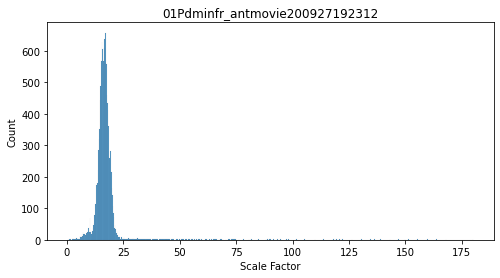

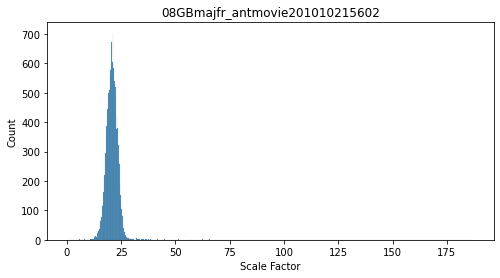

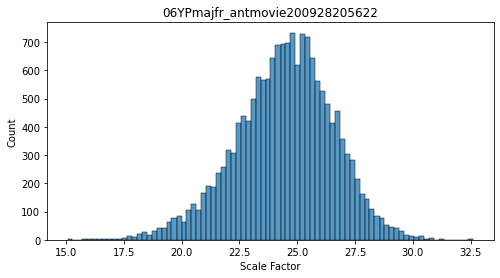

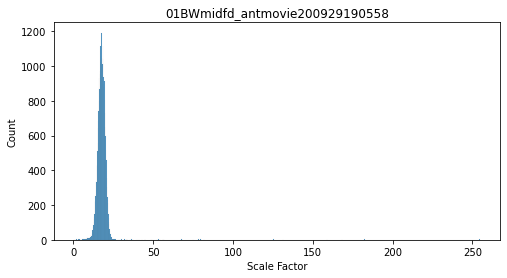

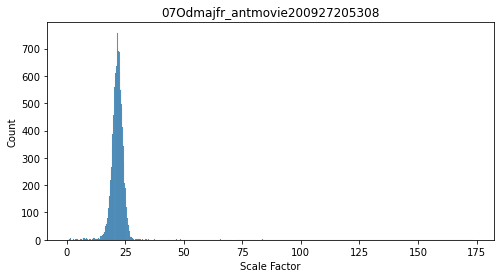

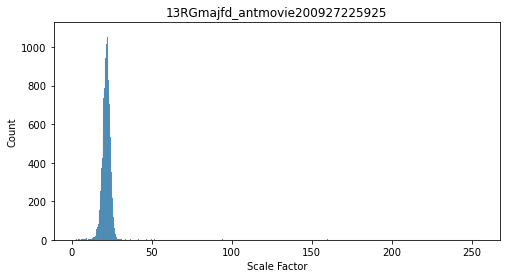

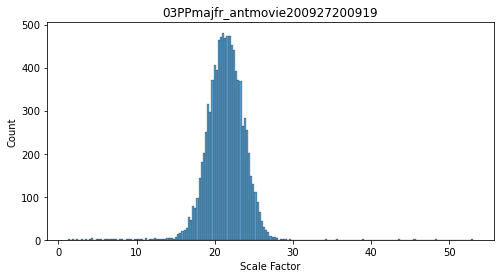

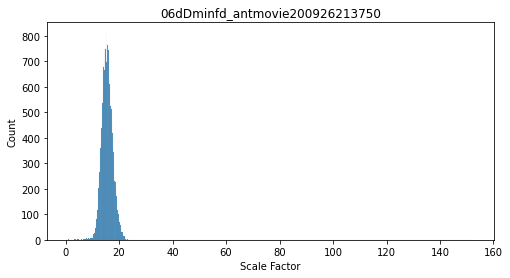

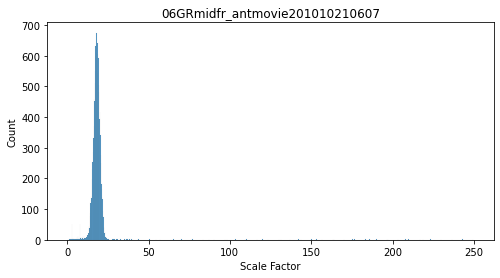

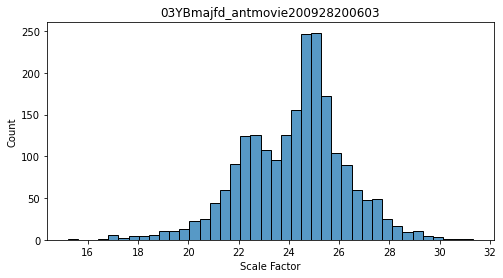

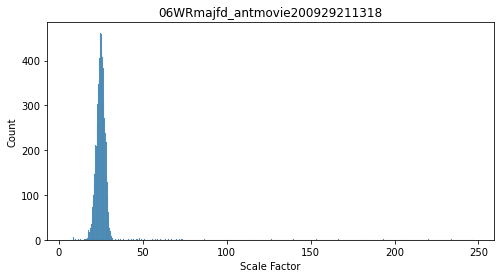

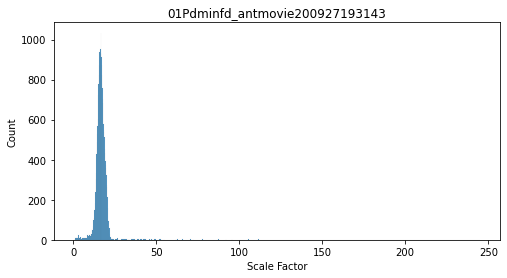

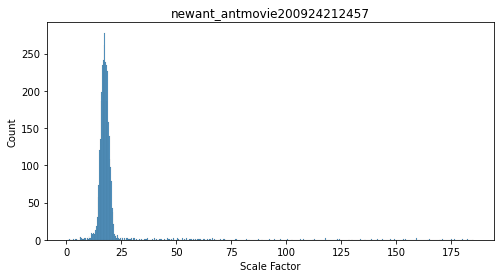

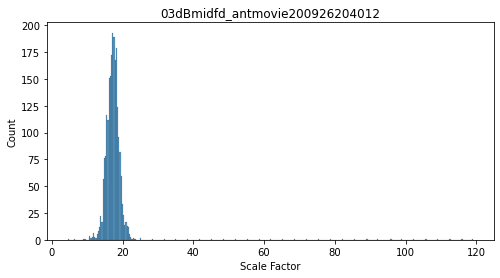

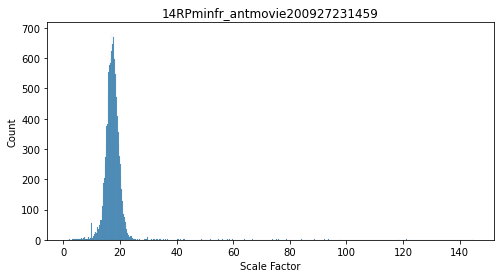

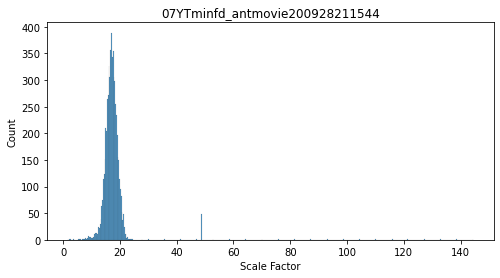

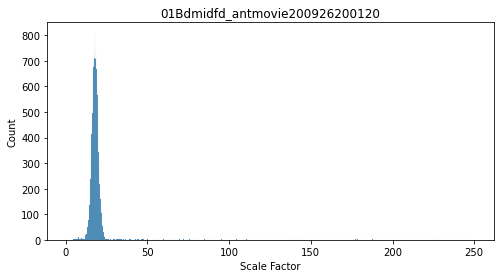

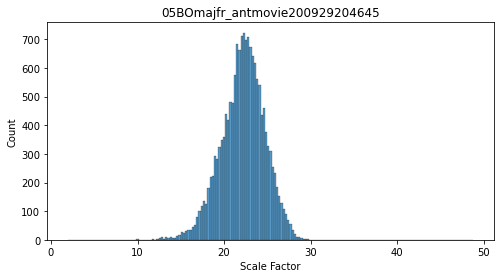

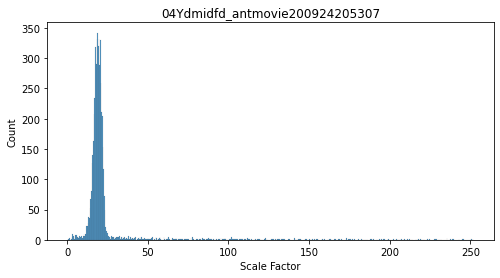

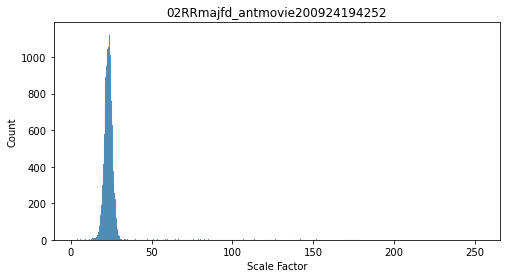

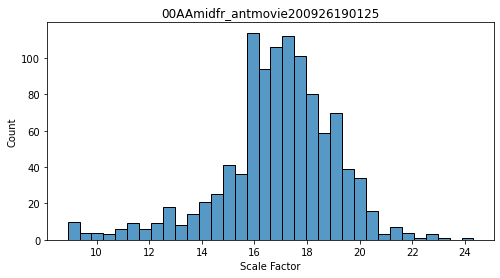

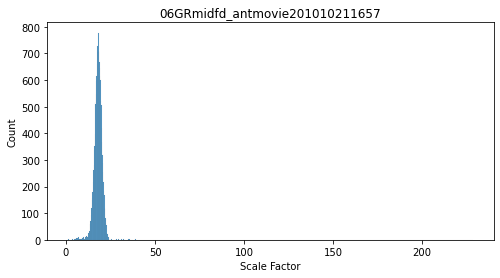

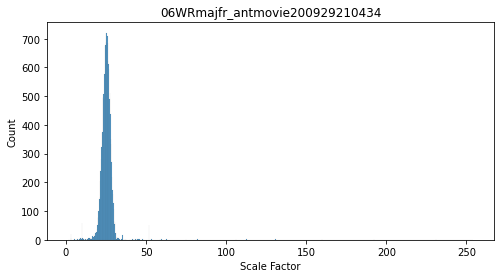

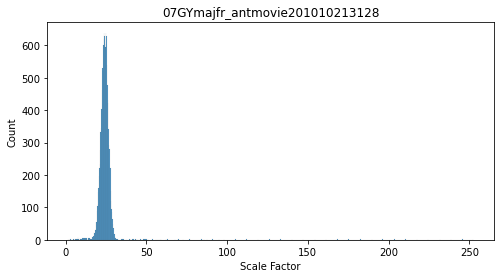

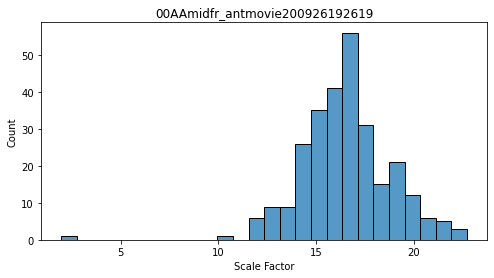

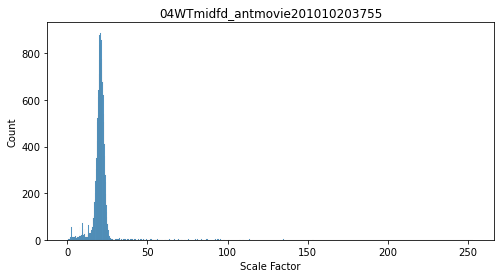

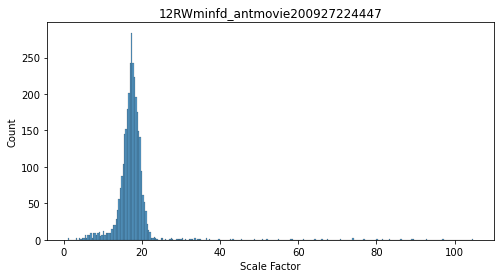

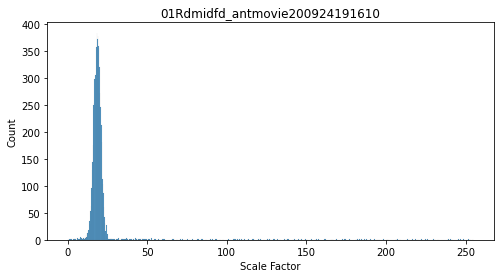

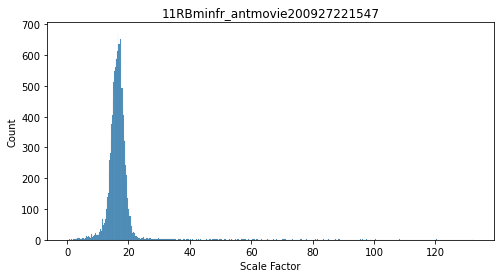

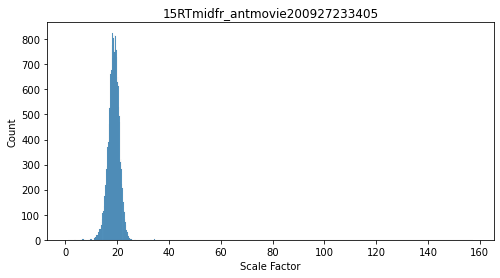

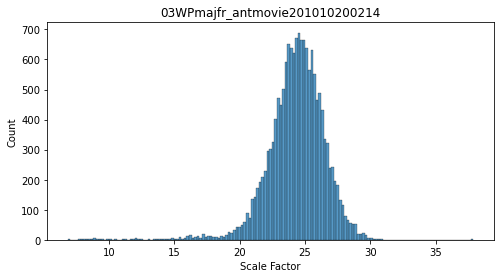

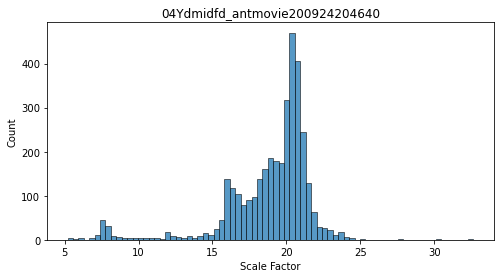

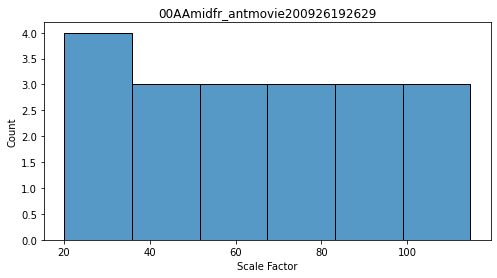

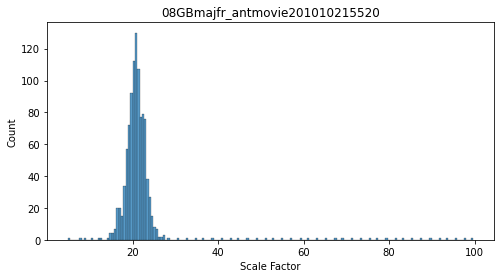

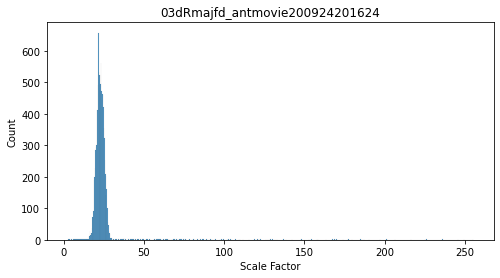

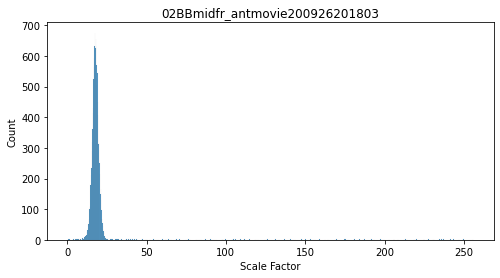

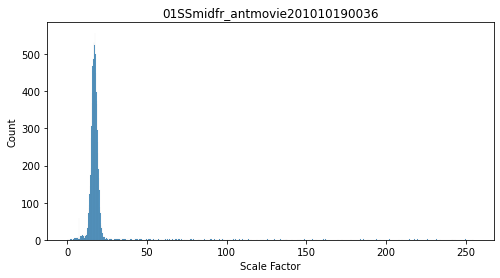

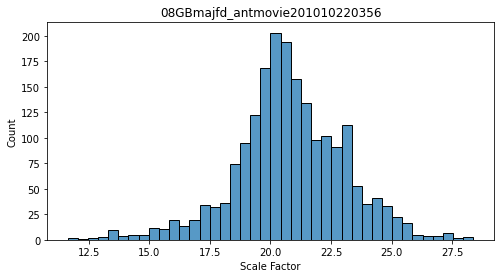

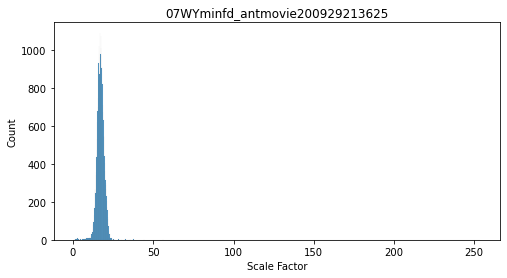

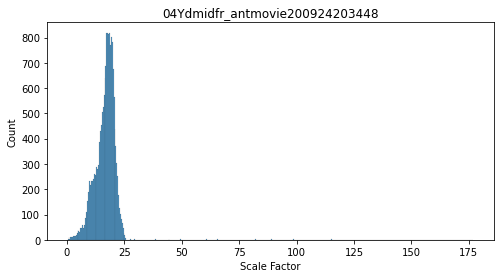

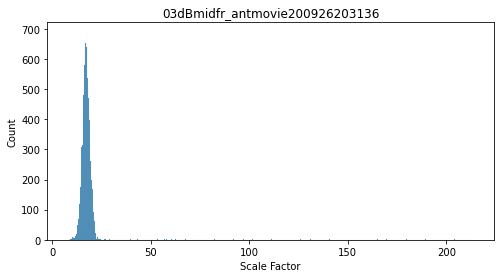

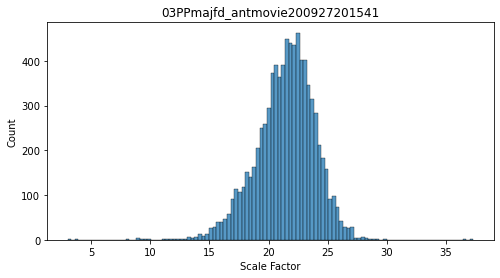

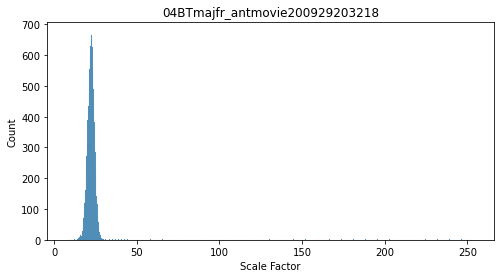

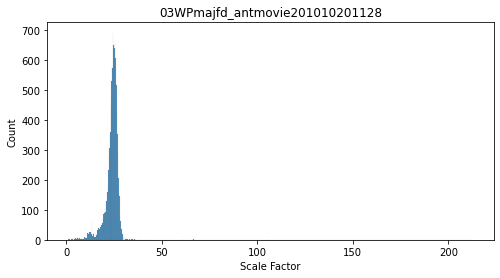

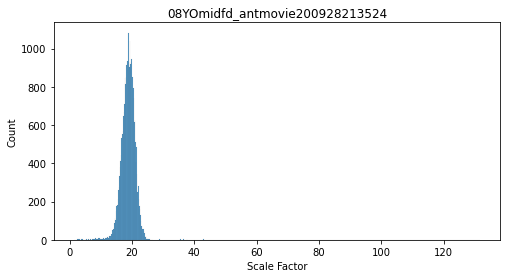

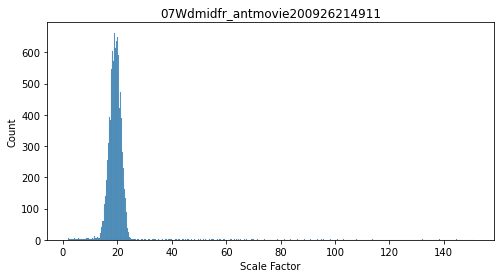

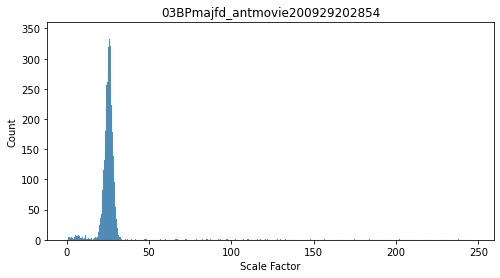

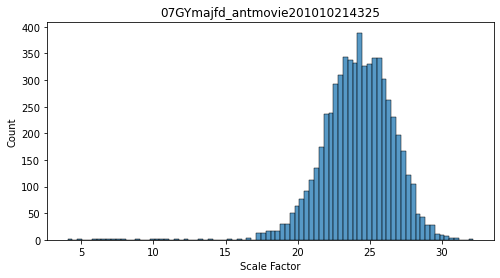

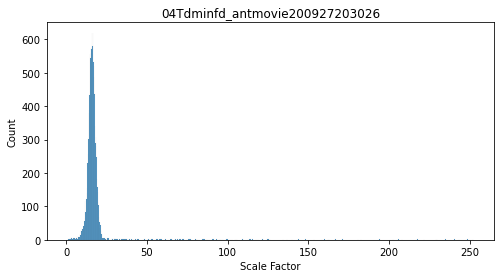

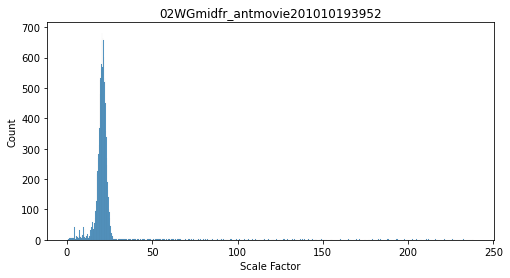

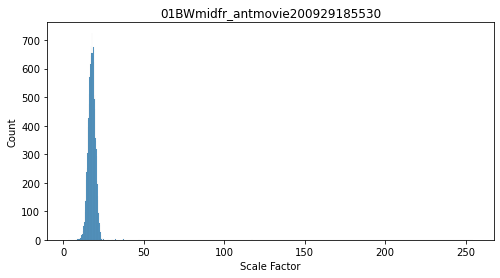

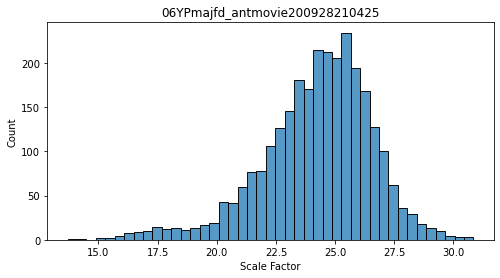

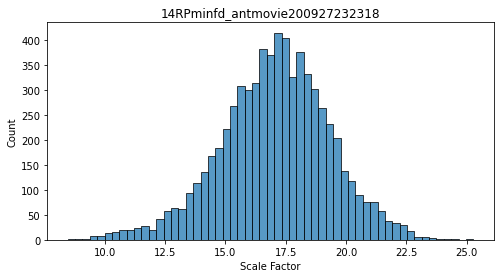

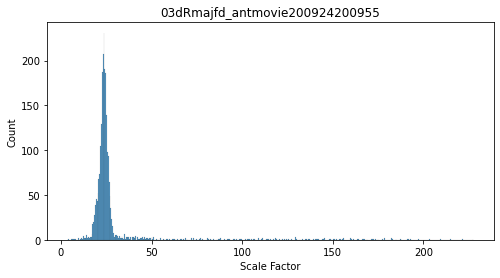

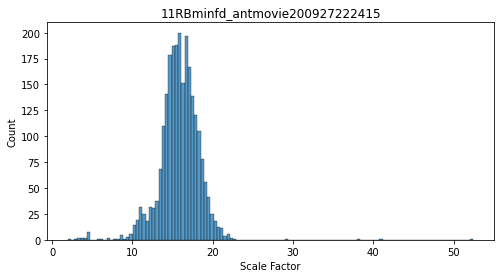

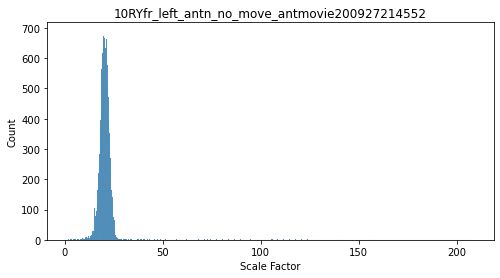

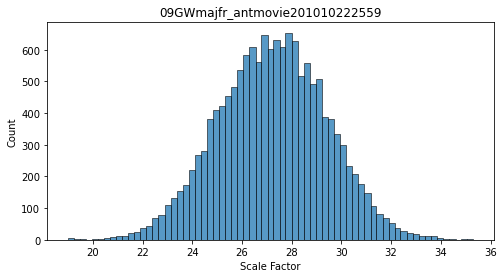

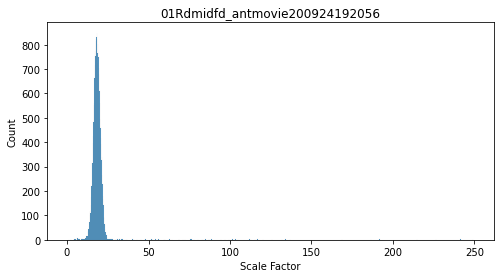

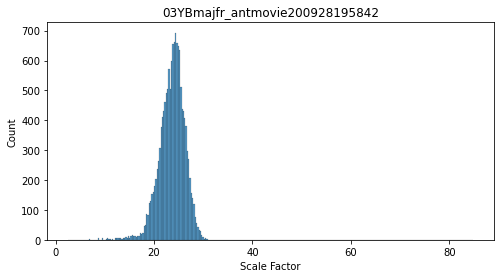

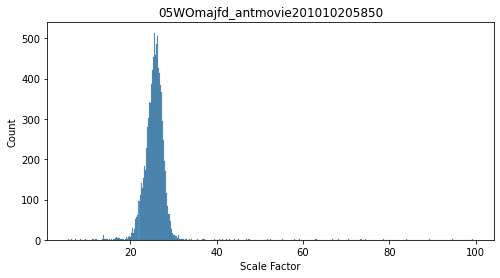

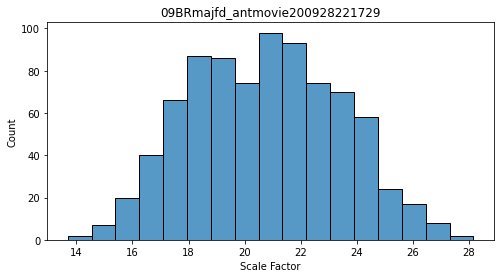

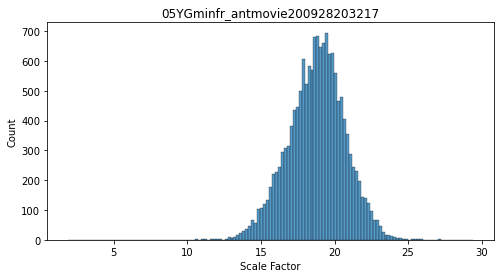

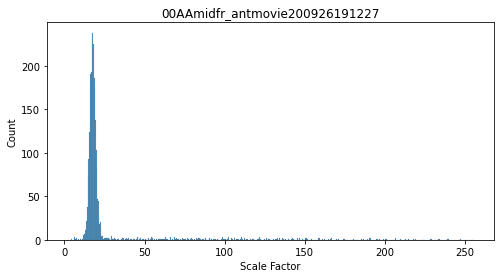

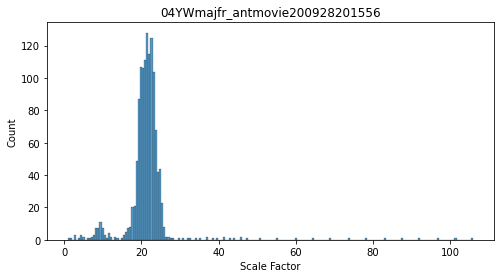

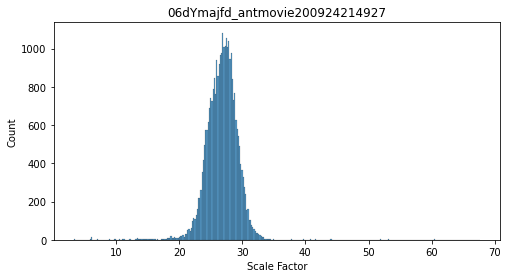

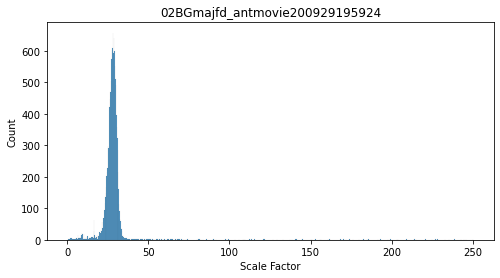

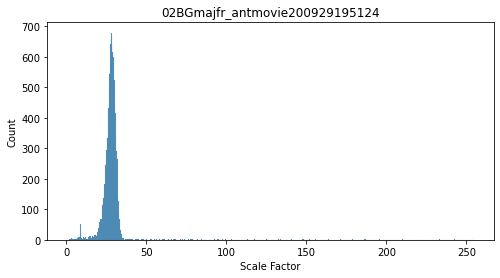

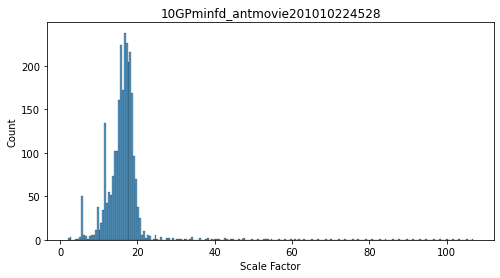

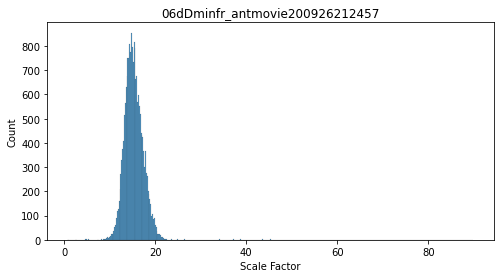

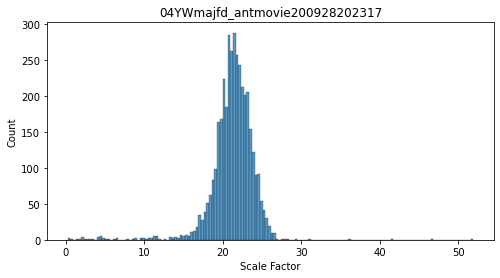

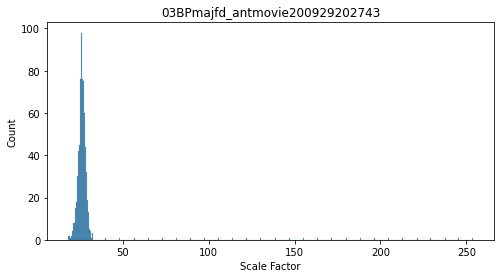

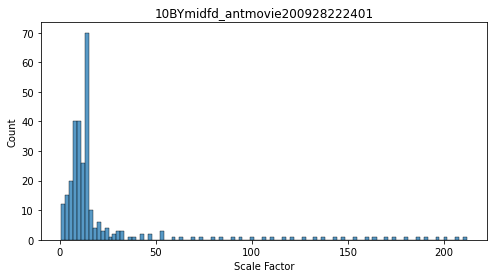

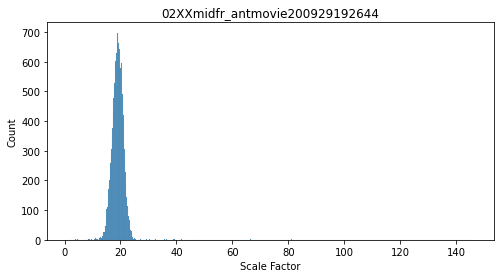

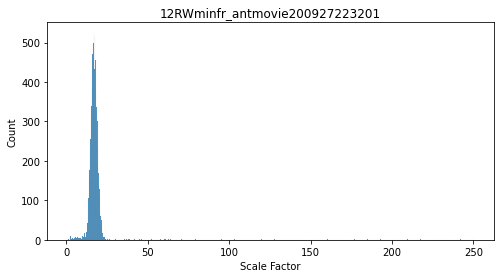

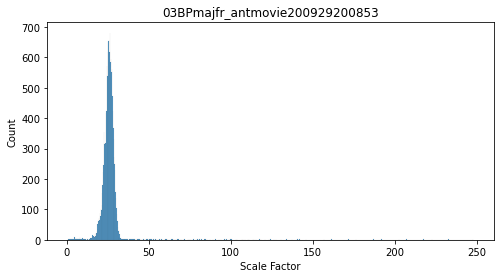

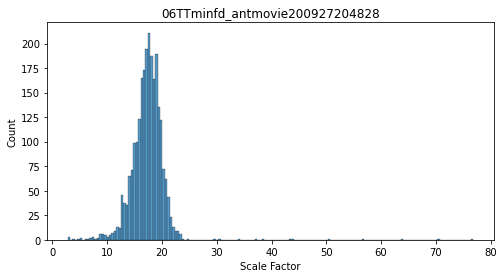

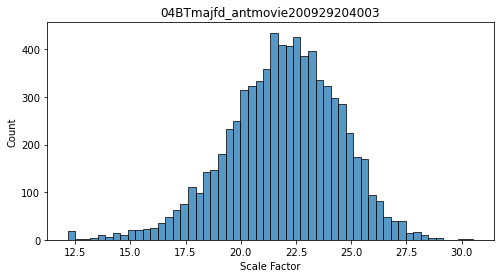

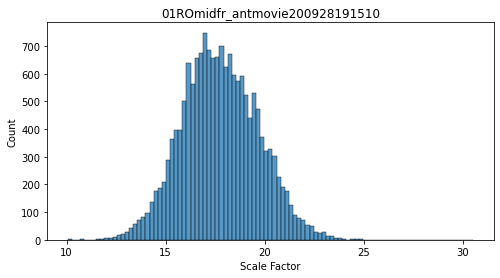

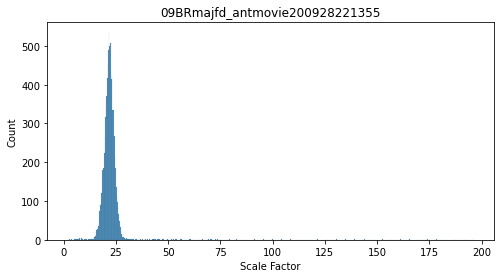

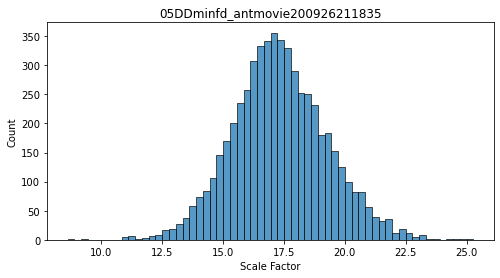

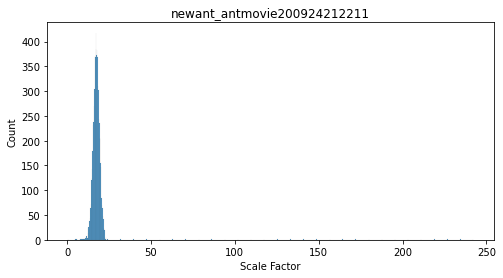

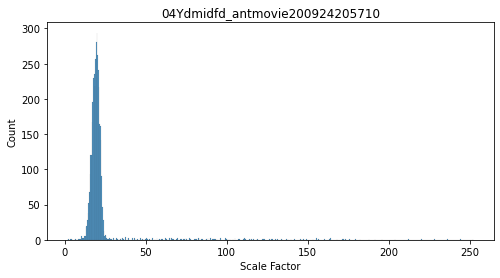

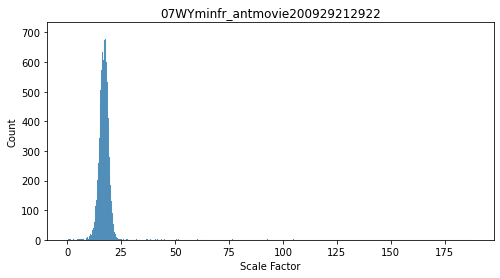

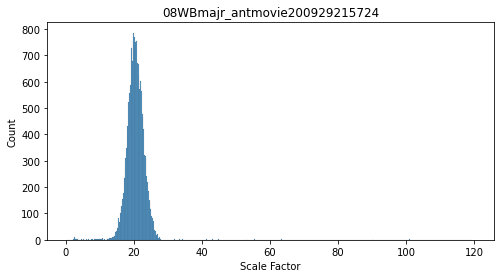

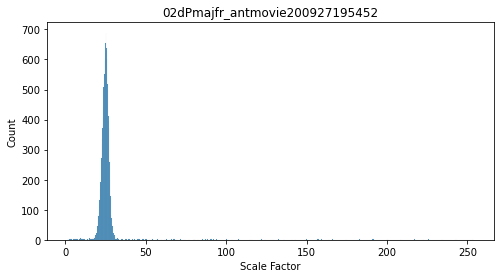

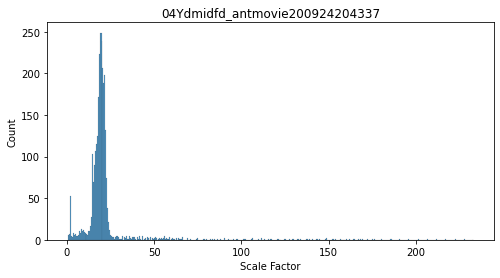

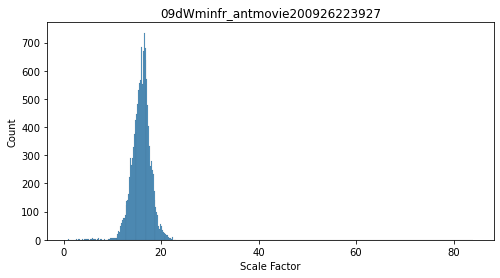

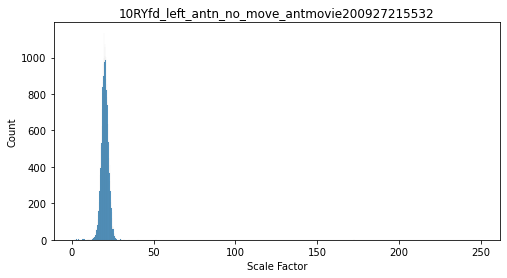

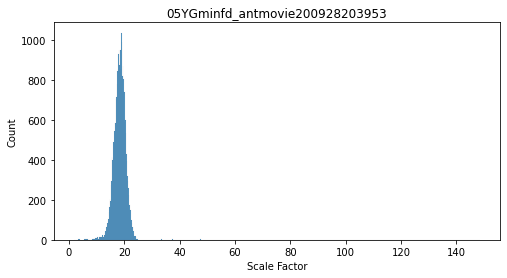

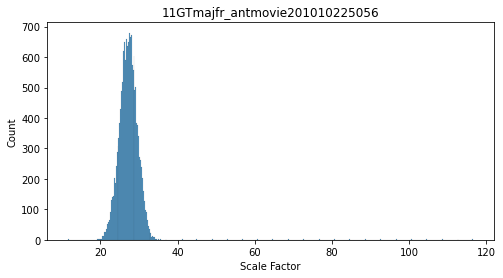

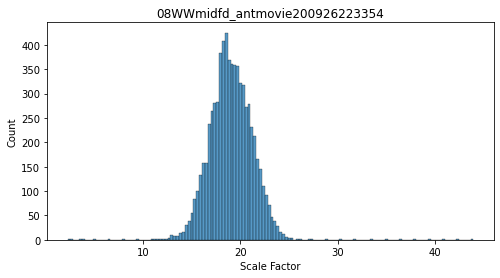

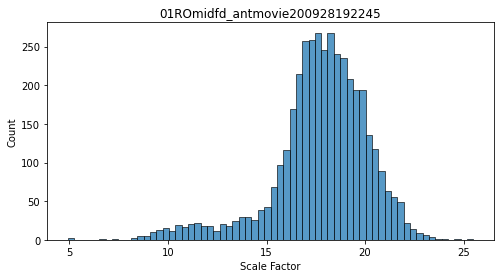

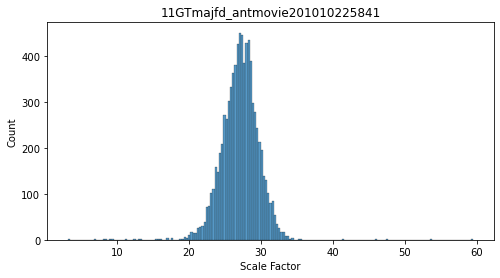

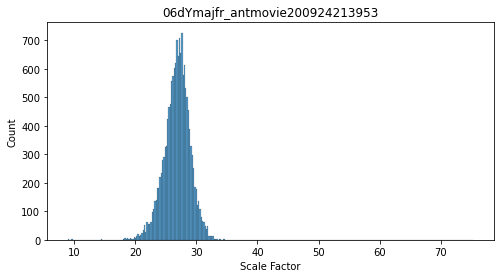

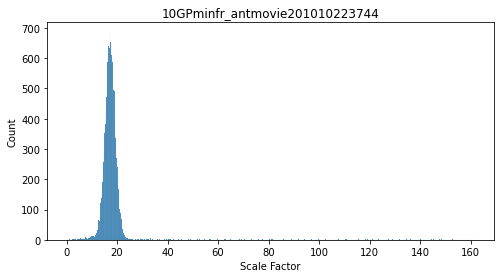

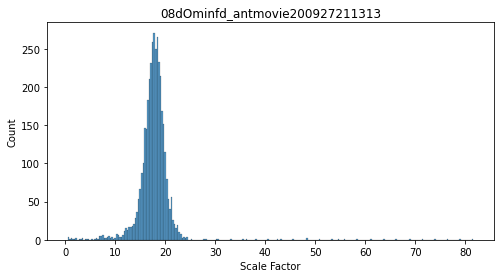

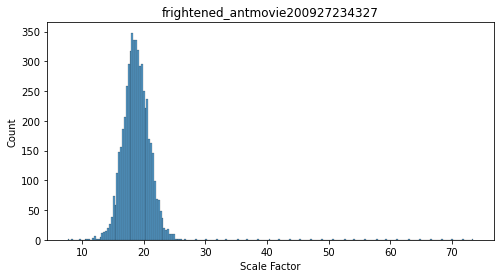

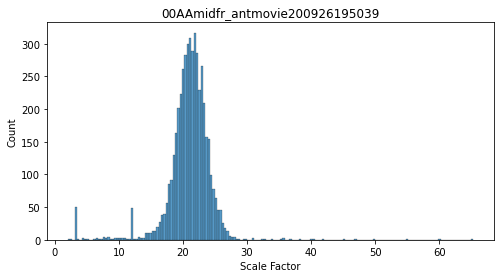

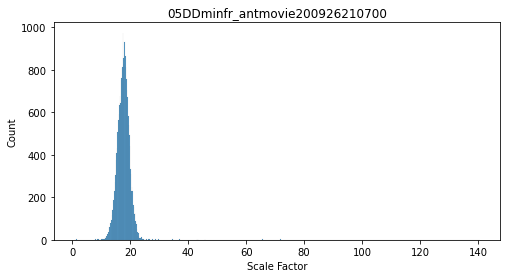

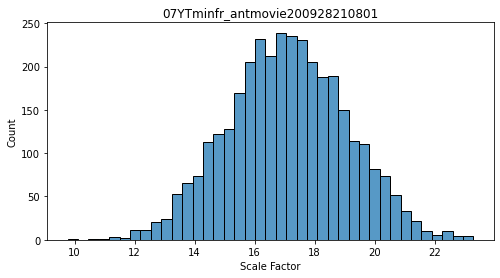

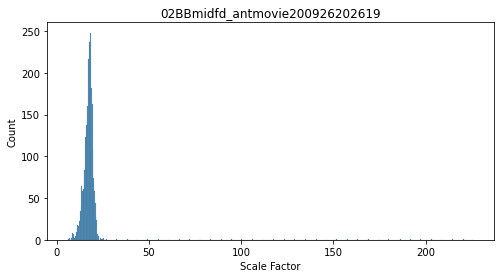

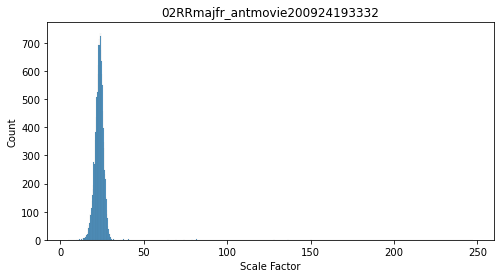

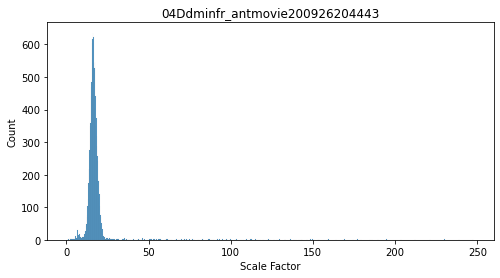

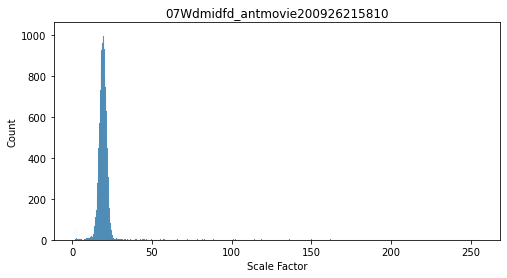

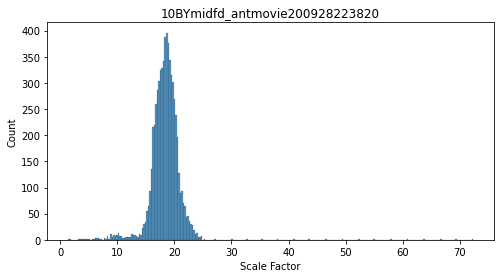

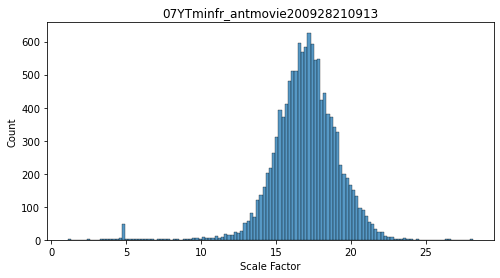

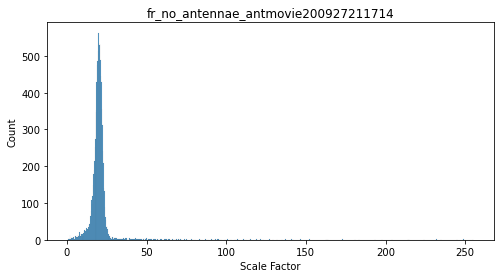

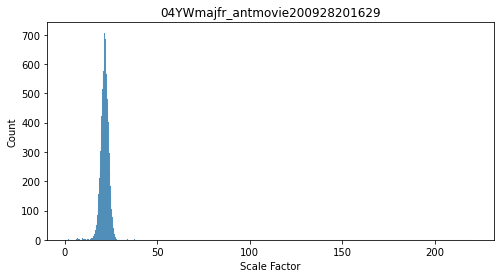

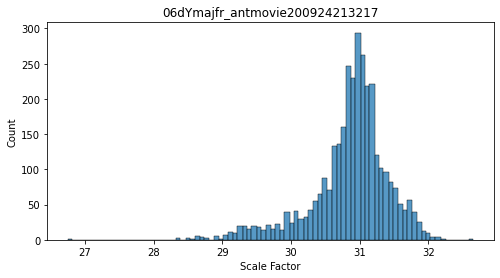

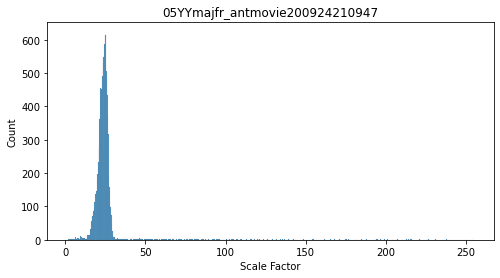

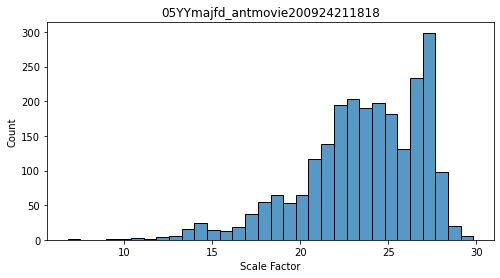

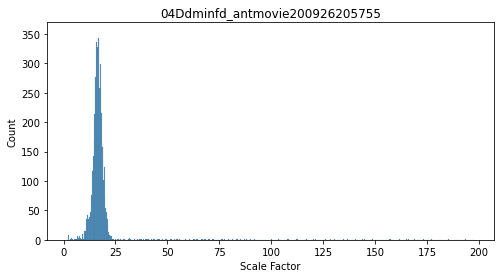

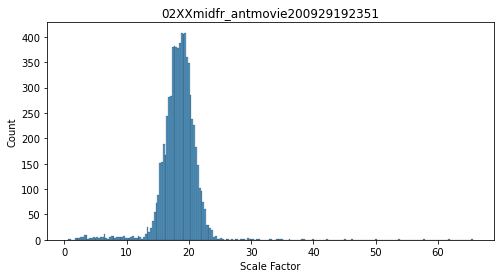

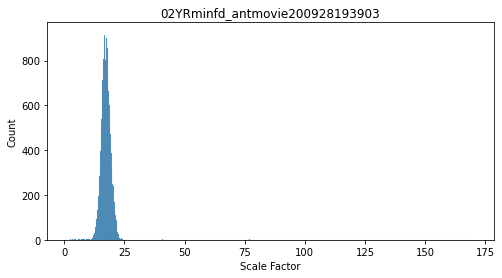

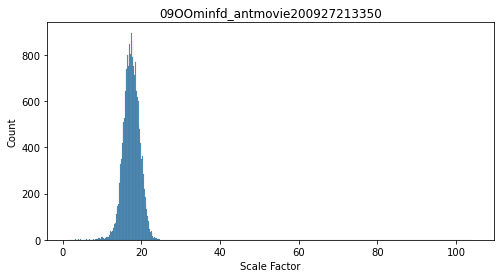

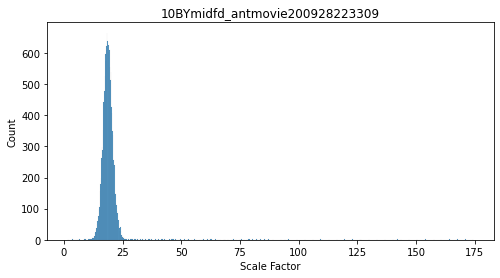

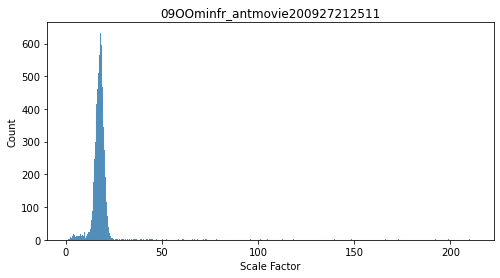

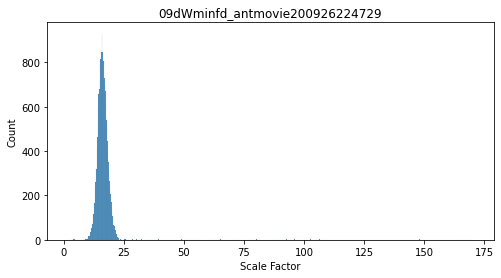

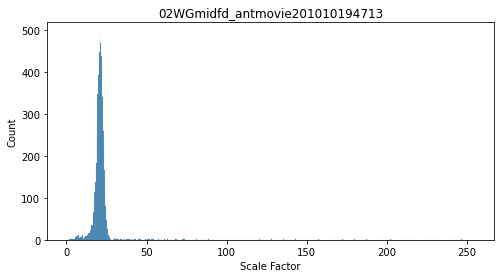

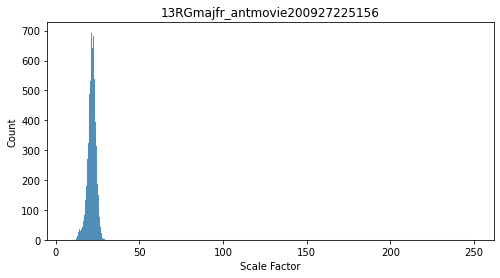

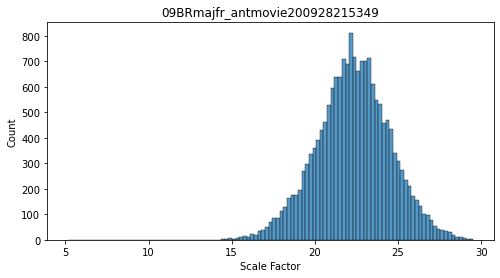

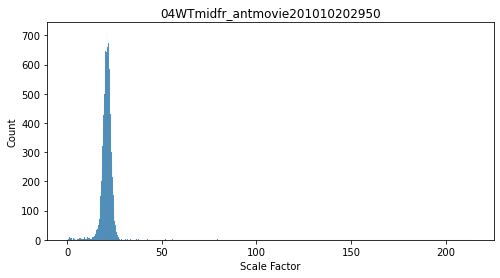

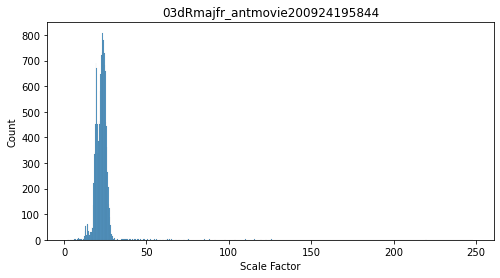

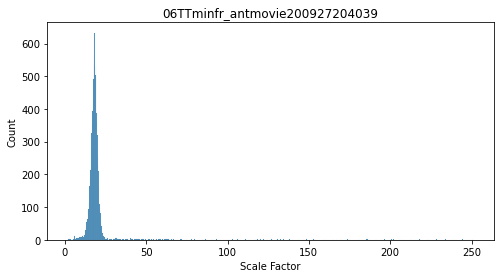

In [105]:
for key,value in bp_data.items():
    plot_scale_distribution(key)

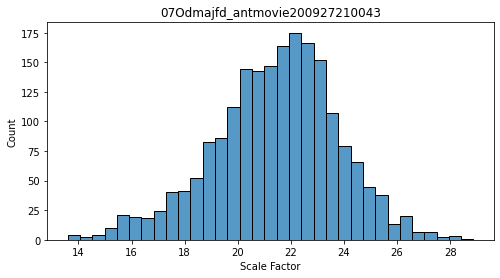

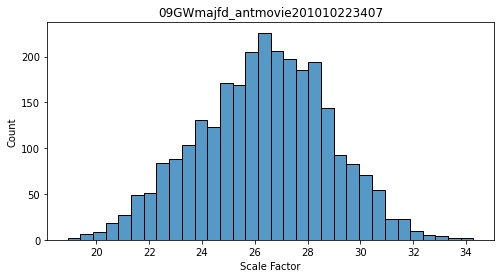

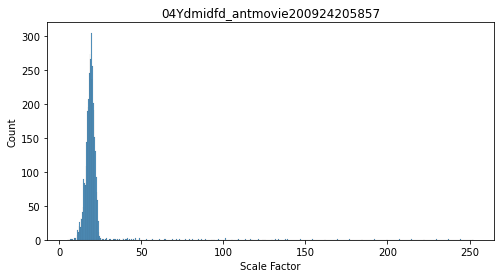

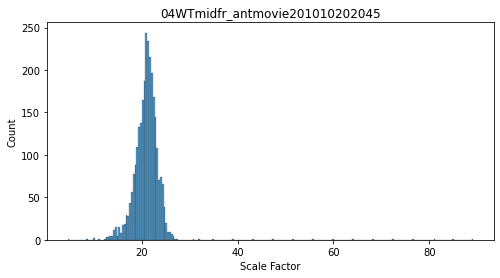

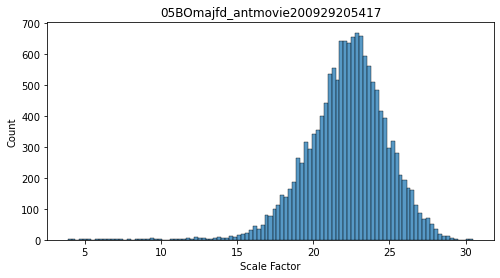

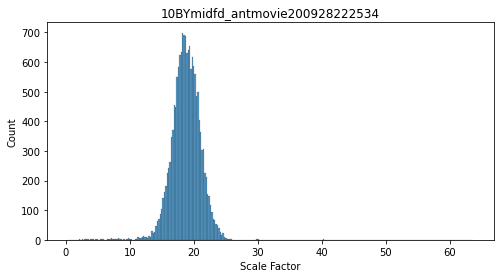

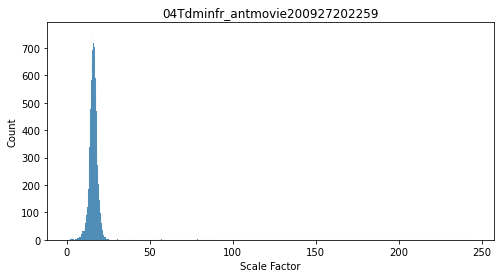

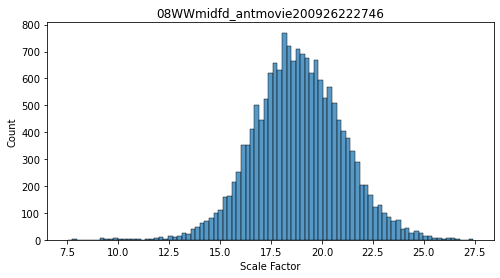

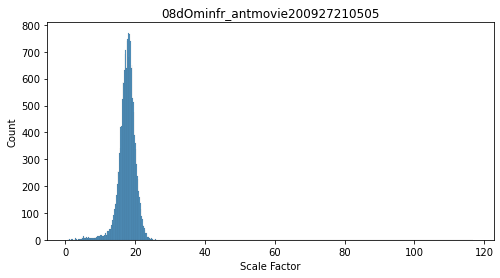

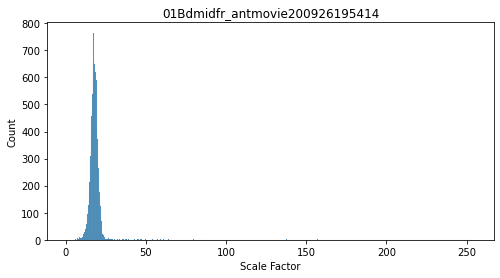

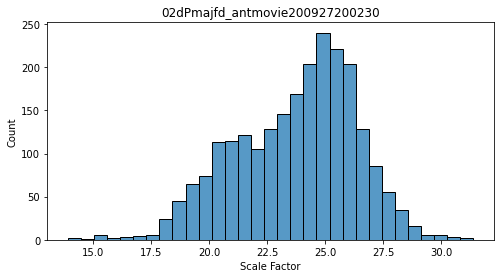

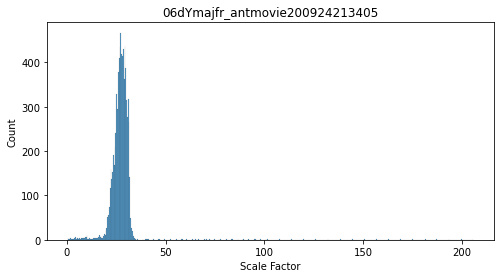

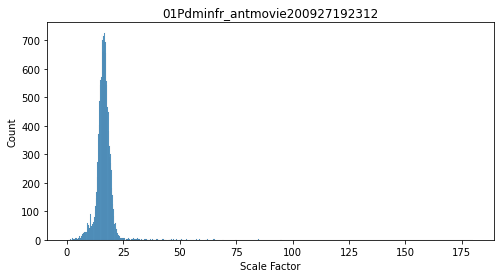

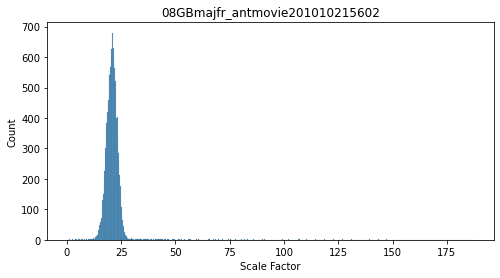

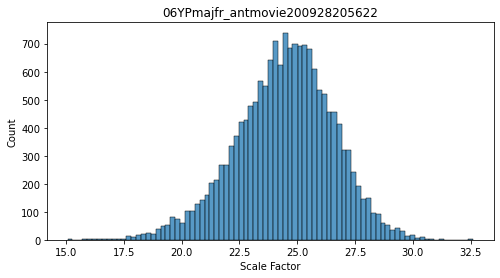

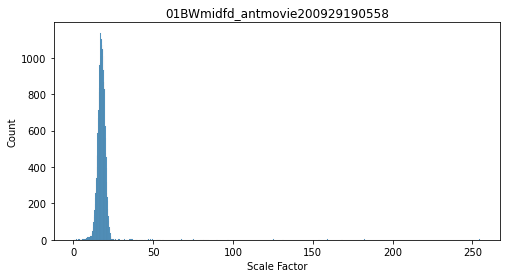

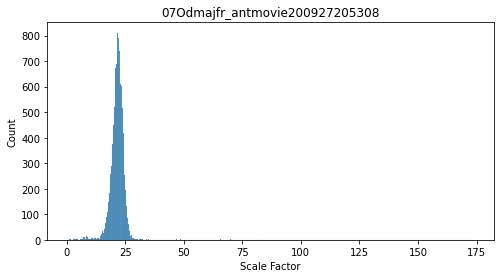

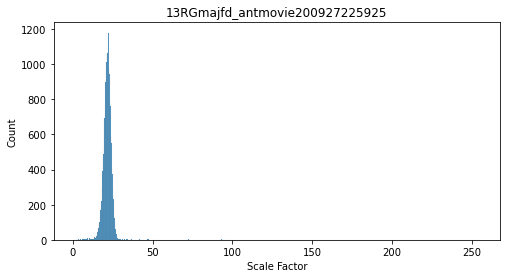

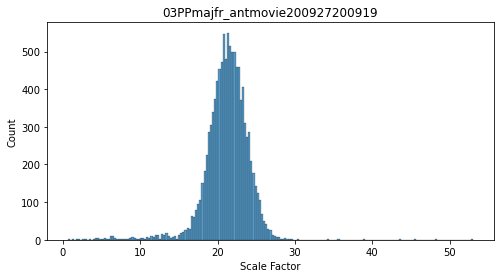

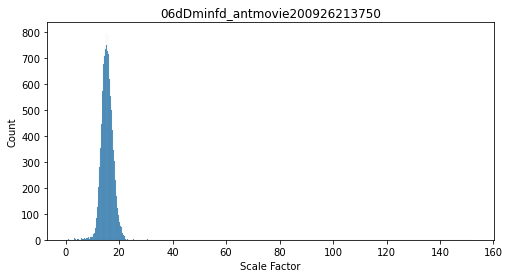

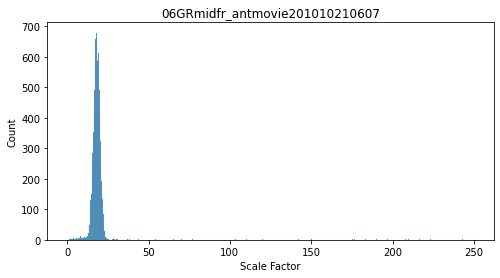

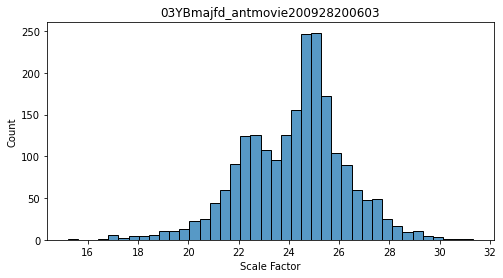

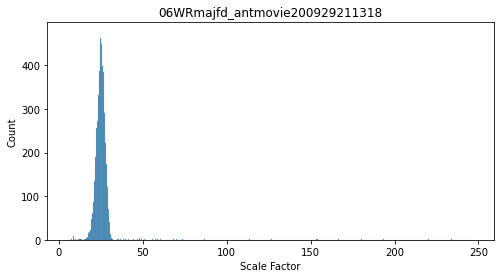

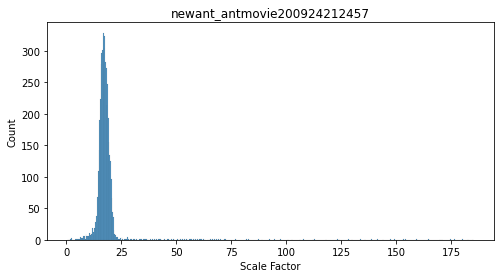

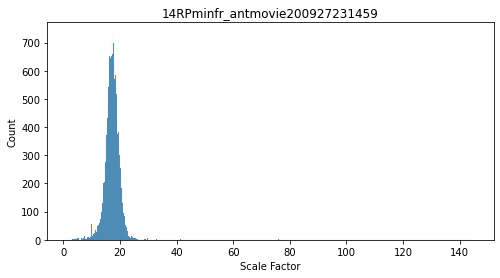

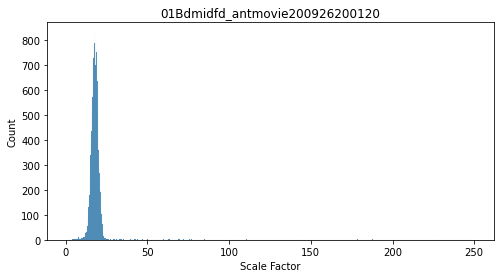

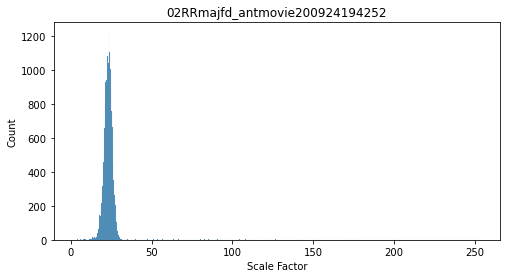

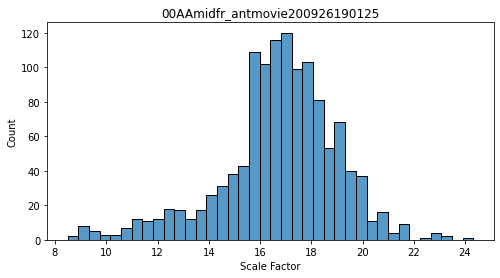

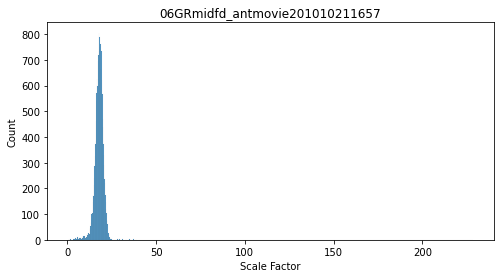

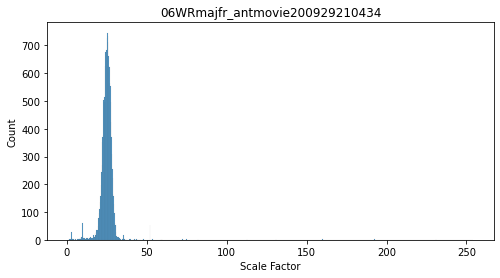

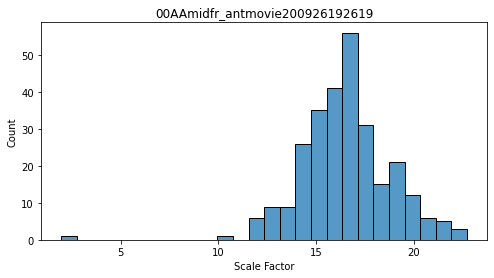

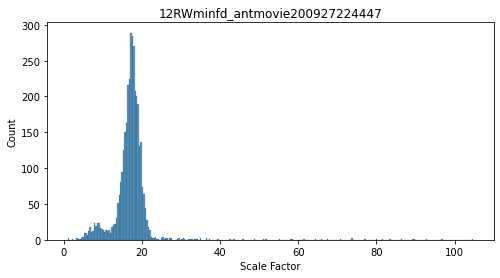

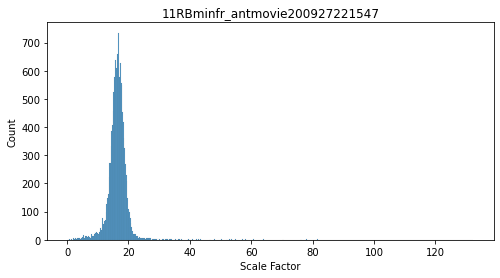

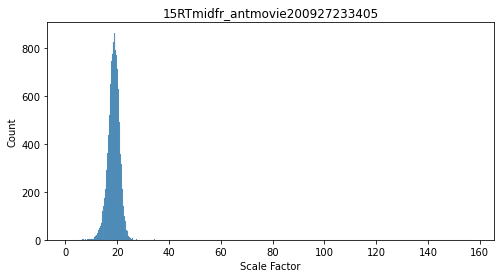

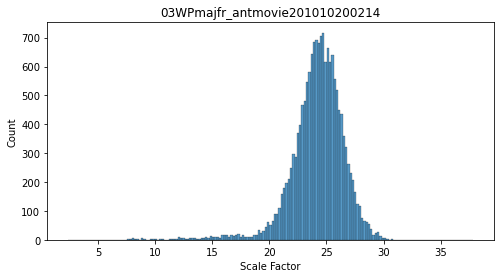

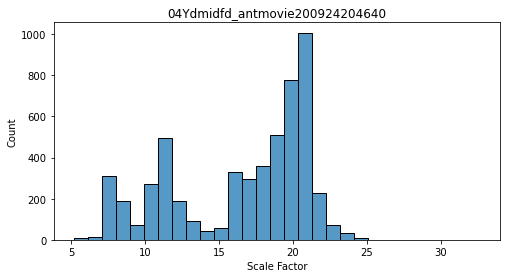

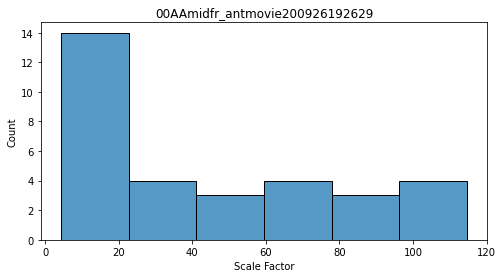

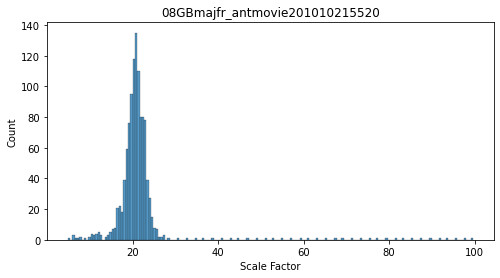

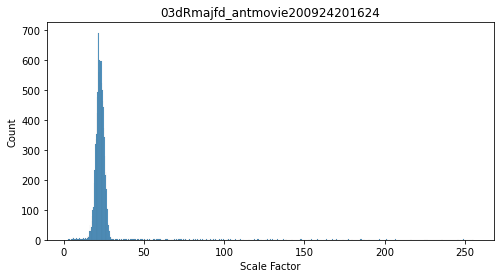

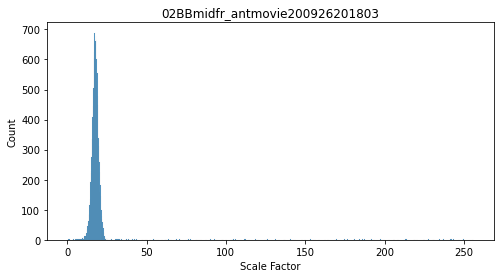

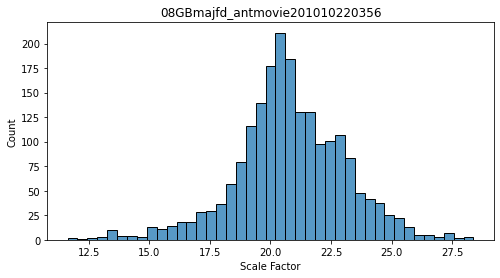

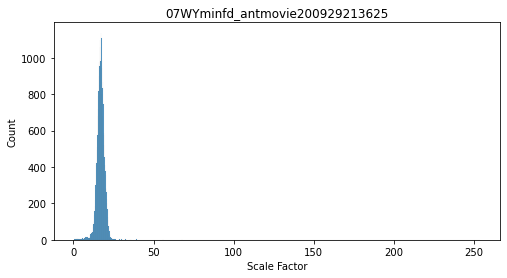

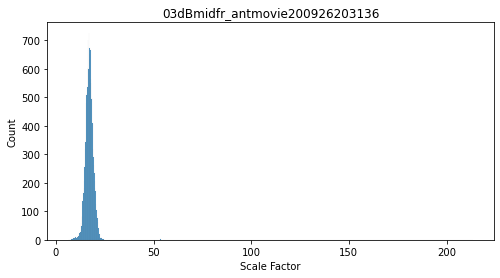

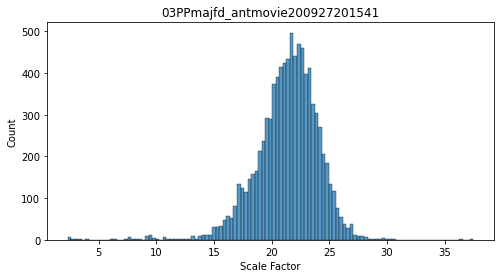

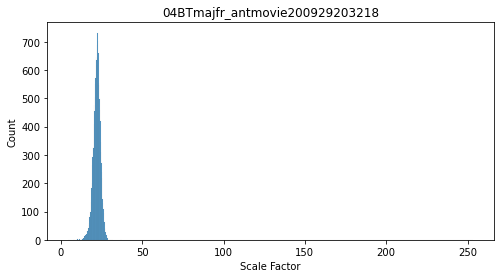

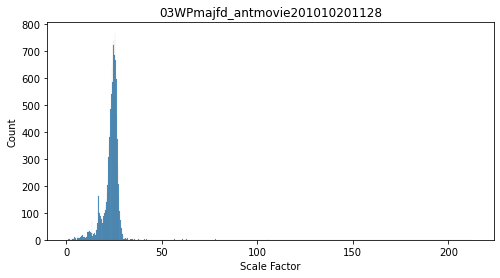

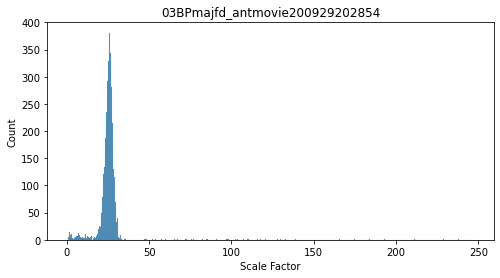

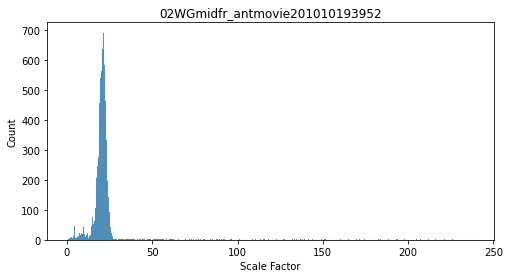

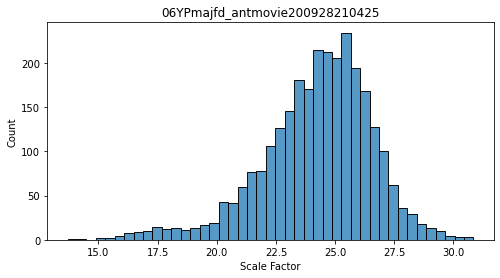

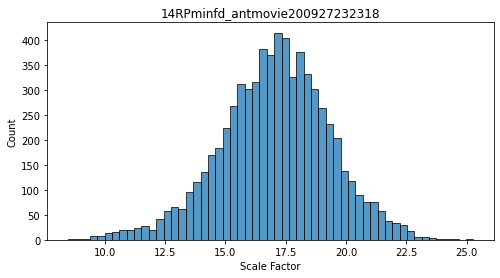

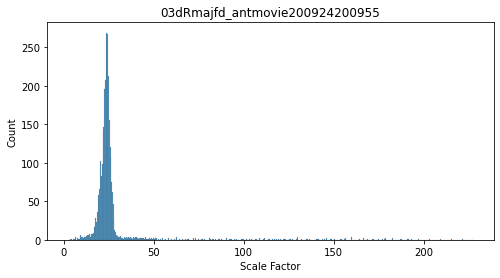

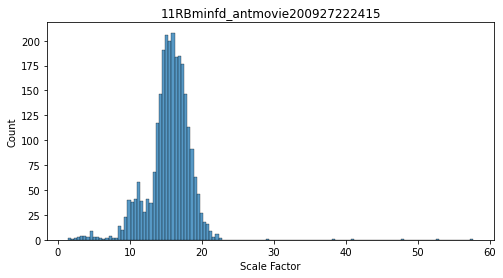

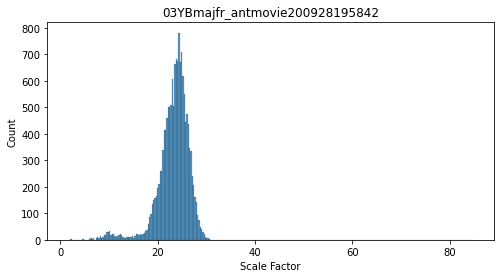

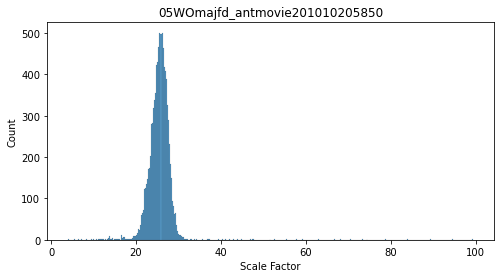

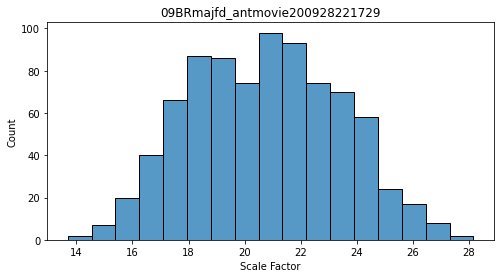

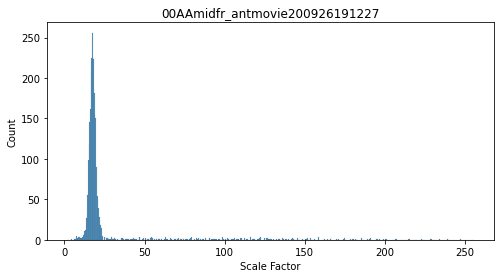

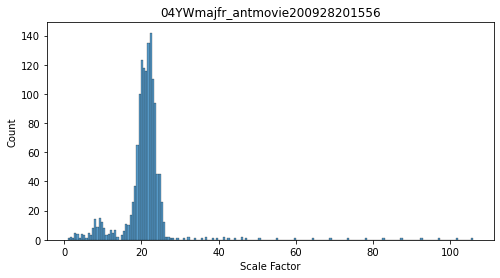

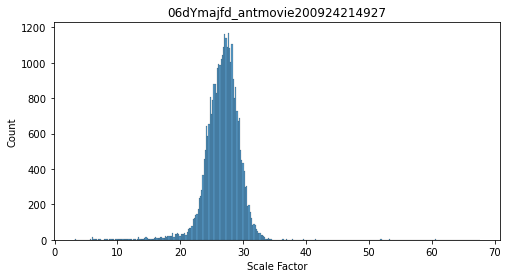

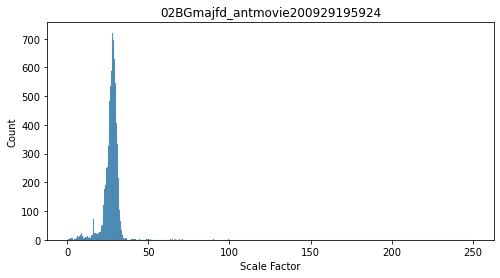

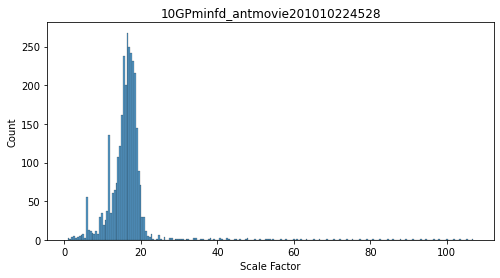

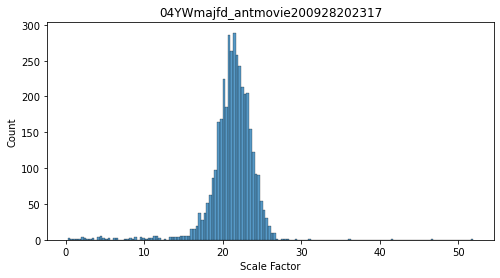

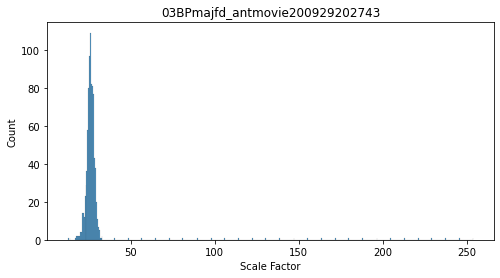

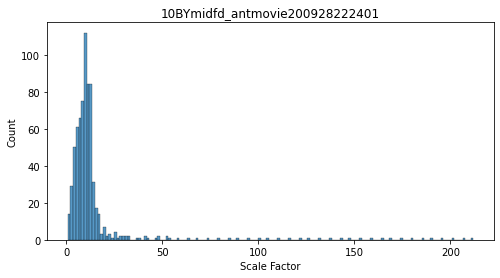

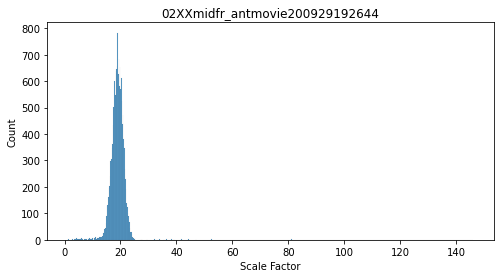

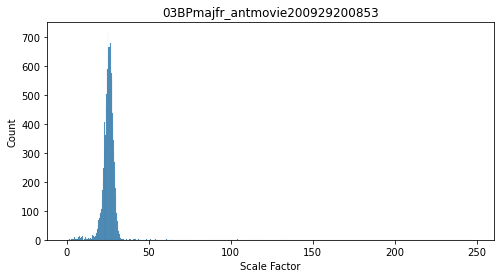

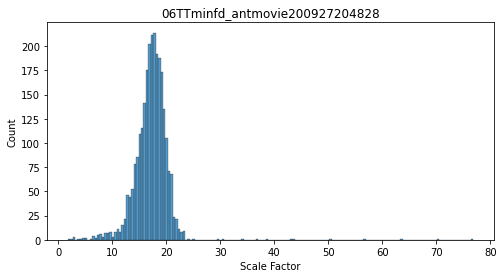

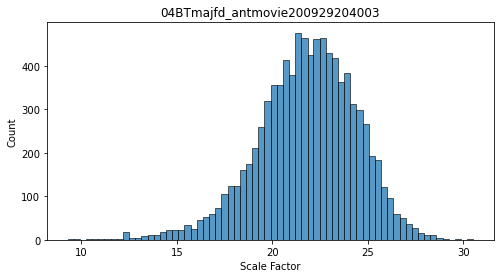

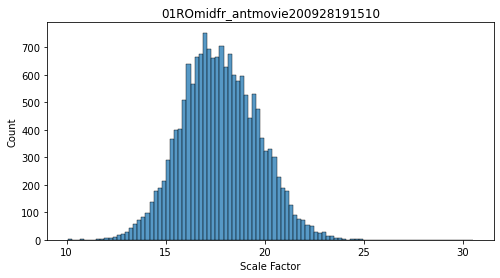

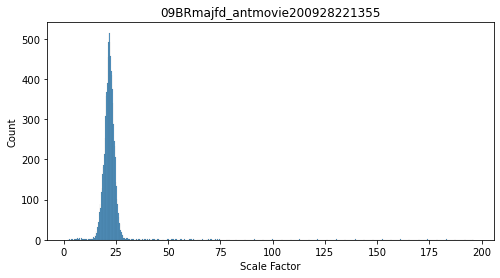

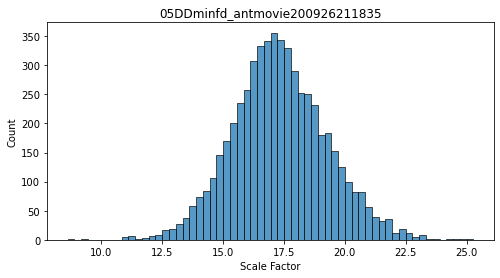

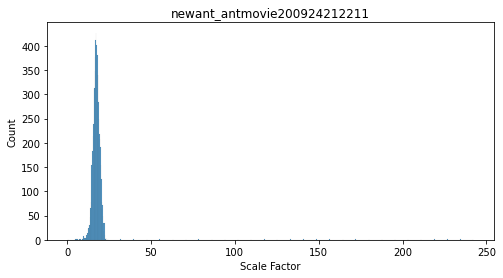

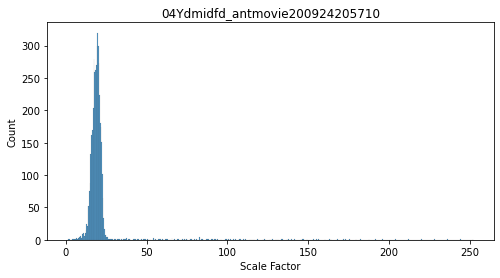

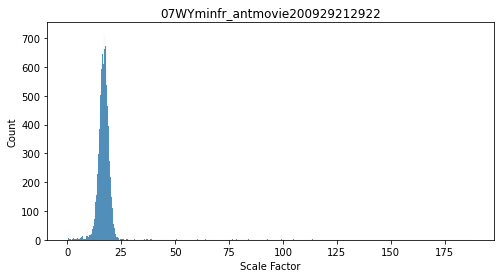

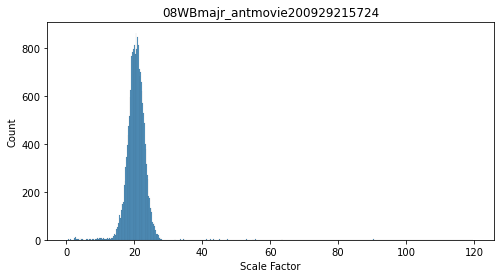

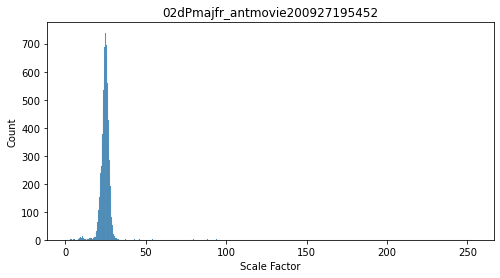

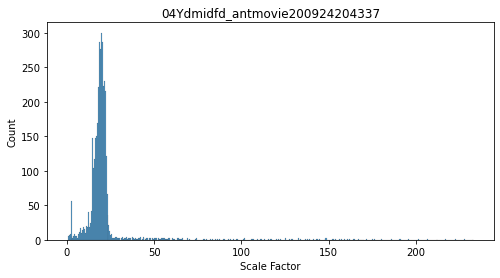

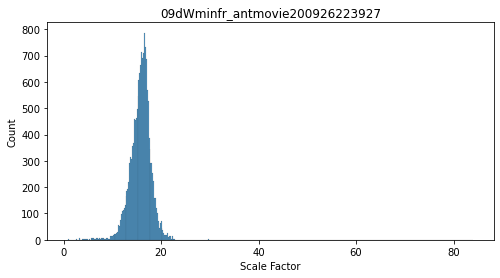

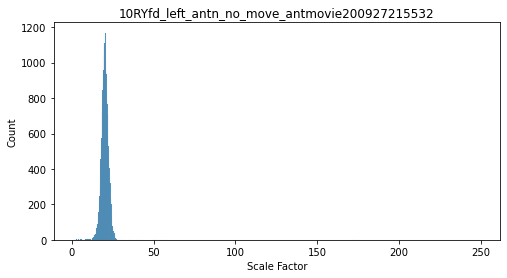

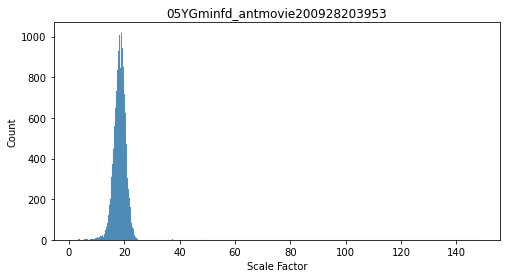

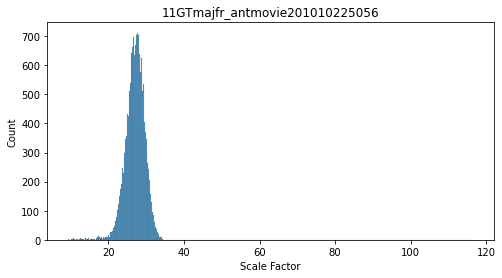

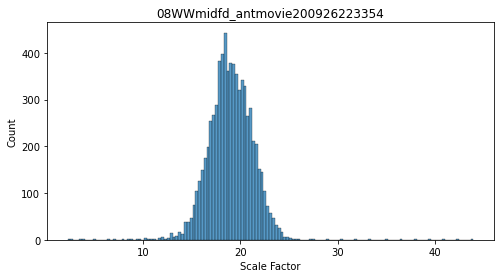

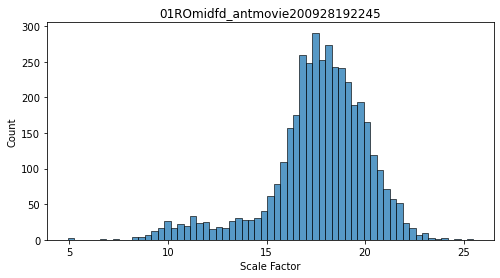

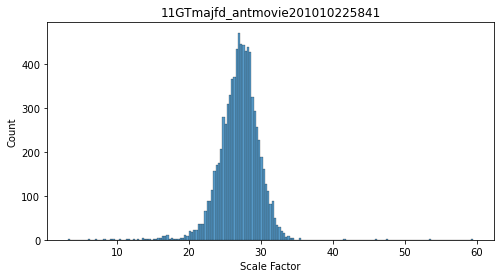

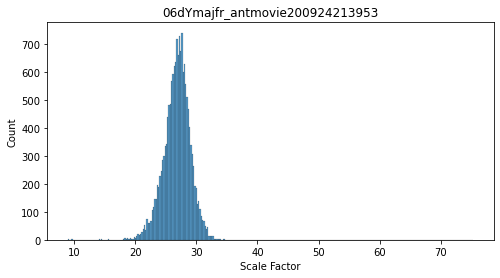

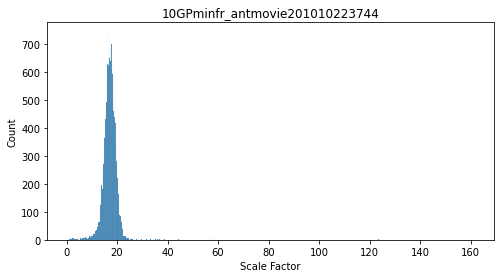

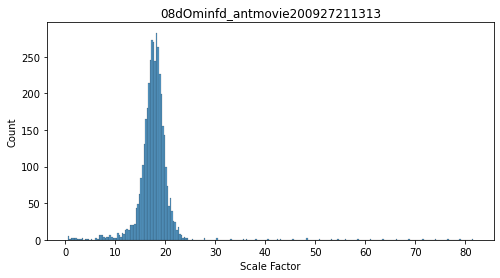

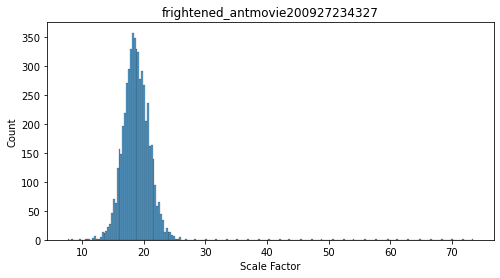

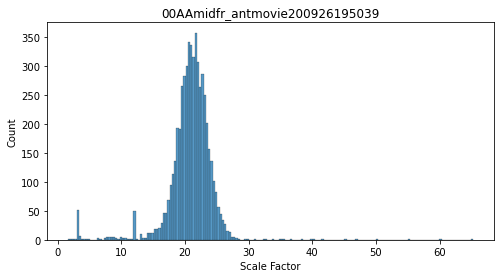

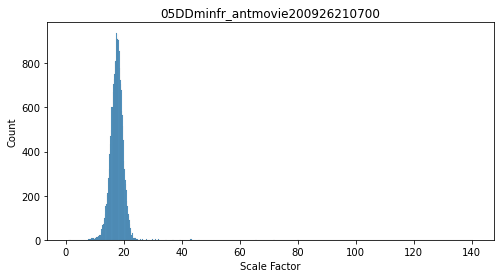

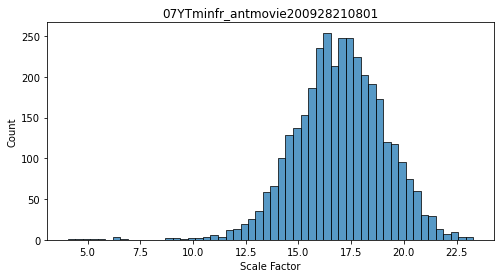

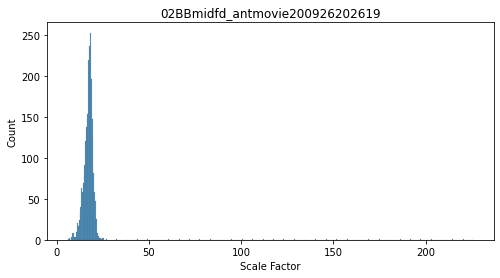

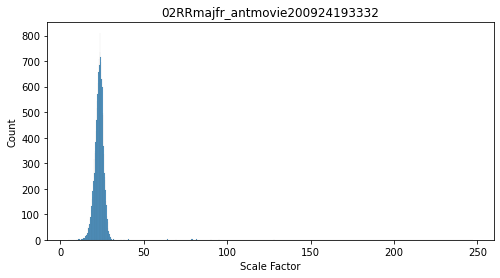

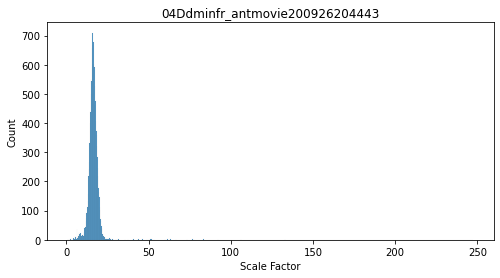

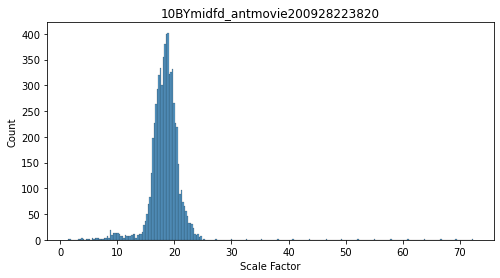

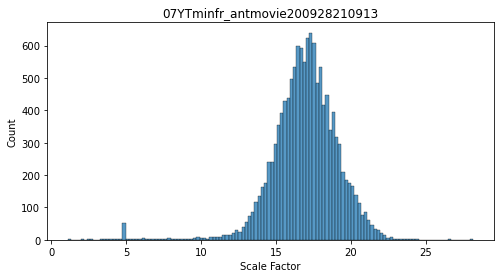

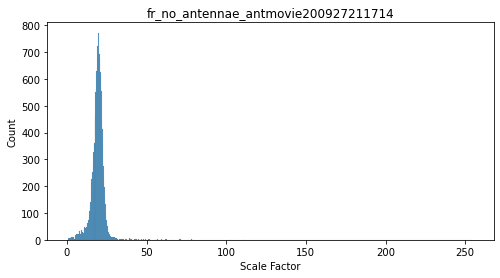

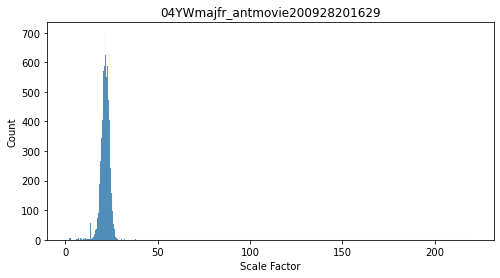

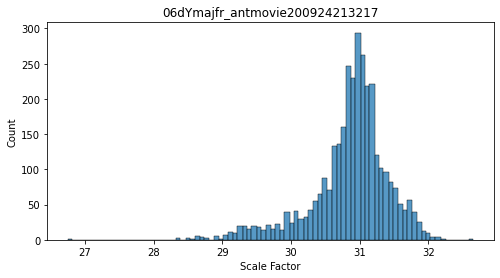

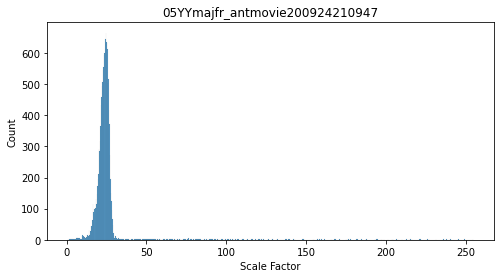

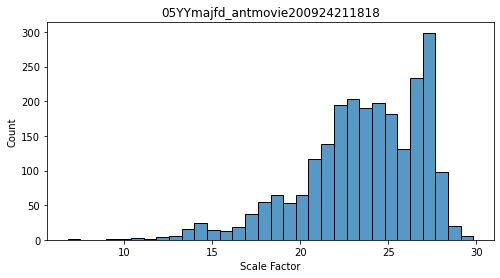

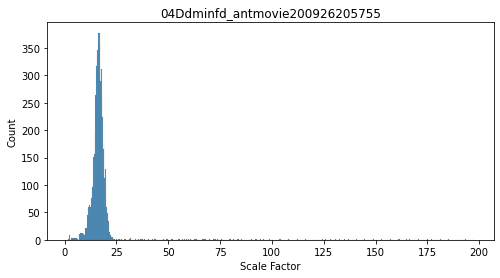

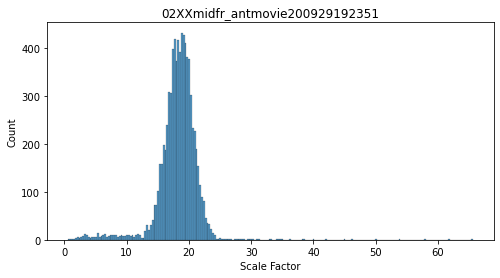

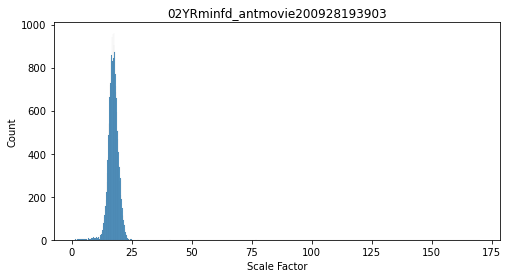

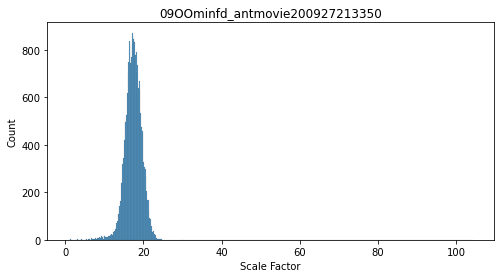

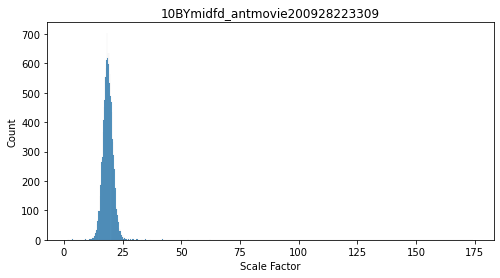

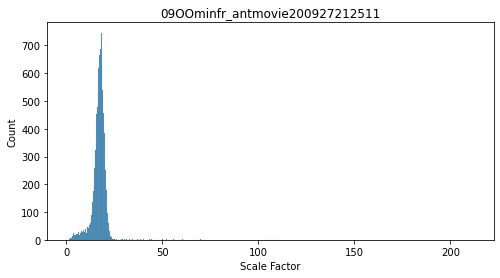

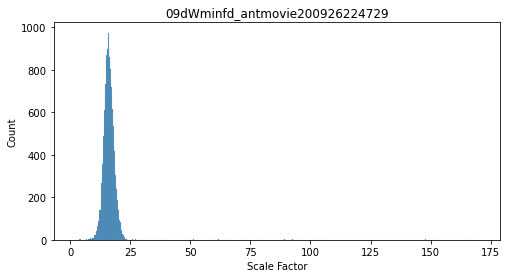

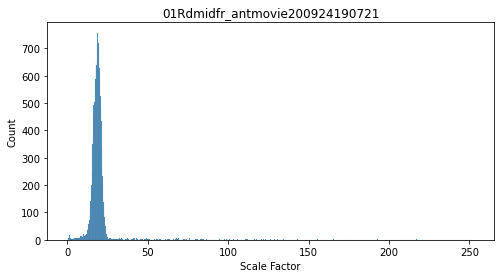

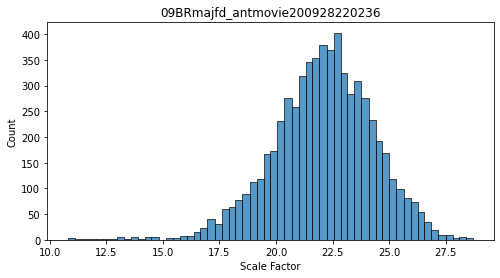

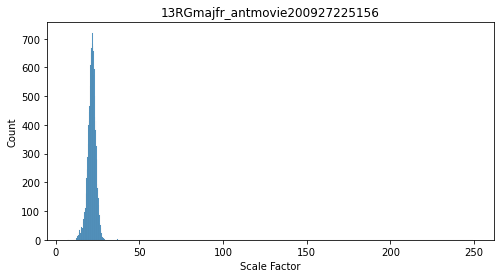

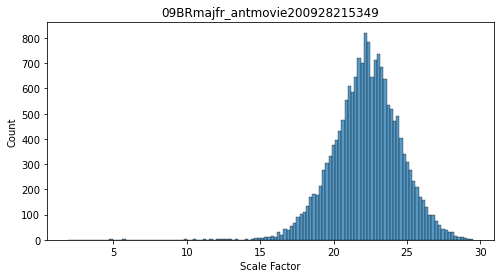

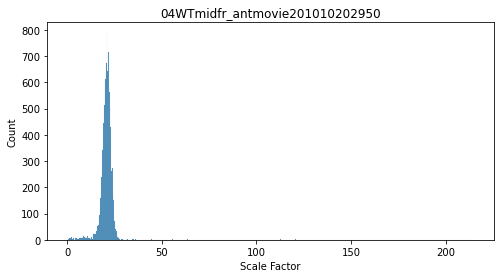

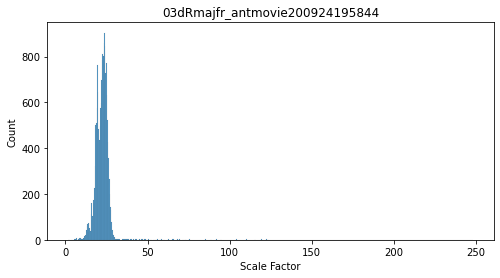

In [85]:
for key,value in bp_data.items():
    plot_scale_distribution(key)

In [228]:
#for i,element in enumerate(dist_dic["07GYmajfr_antmovie201010213128"]):
    #print(i, element)

for i in range(15440, 15465):
    print(f"x: {x_dic['07GYmajfr_antmovie201010213128'][i]}, y: {y_dic['07GYmajfr_antmovie201010213128'][i]}, dist: {dist_dic['07GYmajfr_antmovie201010213128'][i]}")

x: -125.125, y: 169.125, dist: 210.375
x: -129.0, y: 174.875, dist: 217.375
x: -133.125, y: 180.75, dist: 224.5
x: -137.25, y: 186.375, dist: 231.5
x: -141.25, y: 192.125, dist: 238.5
x: -145.25, y: 197.875, dist: 245.5
x: -149.25, y: 203.75, dist: 252.5
x: -153.375, y: 209.375, dist: inf
x: -157.5, y: 215.125, dist: inf
x: -161.375, y: 221.0, dist: inf
x: -165.25, y: 226.75, dist: inf
x: -169.5, y: 232.375, dist: inf
x: -173.5, y: 238.25, dist: inf
x: -177.625, y: 244.0, dist: inf
x: -181.5, y: 249.75, dist: inf
x: -185.5, y: 255.375, dist: inf
x: -189.75, y: 261.25, dist: inf
x: -193.625, y: 267.0, dist: inf
x: -197.5, y: 272.75, dist: inf
x: 15.0, y: -6.546875, dist: 16.375
x: 71.3125, y: -76.4375, dist: 104.5625
x: 20.125, y: -7.8515625, dist: 21.609375
x: 15.0, y: -6.7734375, dist: 16.46875
x: 15.1875, y: -6.484375, dist: 16.515625
x: 15.625, y: -6.5703125, dist: 16.953125


In [18]:
def ant_model_save(bp, skeleton=None, skeleton_color=None, fr=0, bounds=None, title="untitled_ant_model"):
    fig, ax = plt.subplots(figsize=(3,4))
    # plot bodypoints
    ax.scatter(bp[fr,:,0], bp[fr,:,1], s=7, c='k')
    # plot skeleton
    if (skeleton is not None) and (skeleton_color is not None):
        for skeleton_i, color_i in zip(skeleton, skeleton_color):
            ax.plot(bp[fr,skeleton_i,0], bp[fr,skeleton_i,1], alpha=0.7, c=color_i, linewidth=2)
    ax.set(title=f"Ant Model Bodypoints for Frame {fr}",
        xlabel="scaled x coord", ylabel="scaled y coord")
    if bounds is not None:
        ax.set(xlim=[bounds[0],bounds[1]] , ylim=[bounds[2],bounds[3]])
    plt.show()
    fig.savefig(title, bbox_inches='tight')
    return

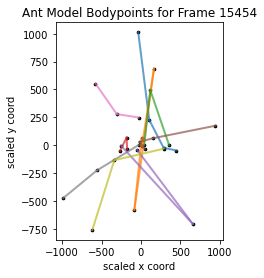

In [19]:
ant_model_save(bp_data['07GYmajfr_antmovie201010213128'], skeleton, skeleton_color, fr=15454, title="bp_error1")


In [231]:
for i in range(16795, 16800):
    print(f"x1: {x1_dic['06WRmajfr_antmovie200929210434'][i]}, y1: {y1_dic['06WRmajfr_antmovie200929210434'][i]}")
    print(f"x2: {x2_dic['06WRmajfr_antmovie200929210434'][i]}, y2: {y2_dic['06WRmajfr_antmovie200929210434'][i]}")
    print(f"dist: {dist_dic['06WRmajfr_antmovie200929210434'][i]}")
    print("")

x1: 56.75, y1: 107.5
x2: 81.375, y2: 112.4375
dist: 246.625

x1: 57.4375, y1: 107.75
x2: 82.375, y2: 111.0
dist: 251.75

x1: 60.40625, y1: 107.0625
x2: 85.5625, y2: 108.625
dist: inf

x1: 60.78125, y1: 106.625
x2: 84.875, y2: 110.4375
dist: inf

x1: 60.46875, y1: 106.5
x2: 84.3125, y2: 108.4375
dist: 9.796875



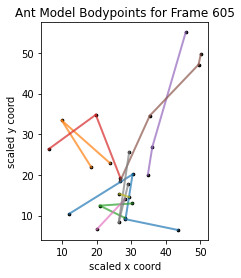

In [20]:
ant_model_save(bp_data['02BGmajfr_antmovie200929195124'], skeleton, skeleton_color, fr=605, title="bp_error2")

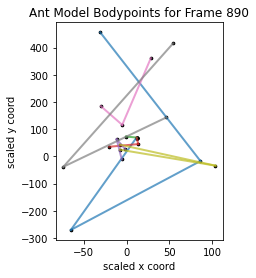

In [21]:
ant_model_save(bp_data['03BPmajfd_antmovie200929202743'], skeleton, skeleton_color, fr=890, title="bp_error3")

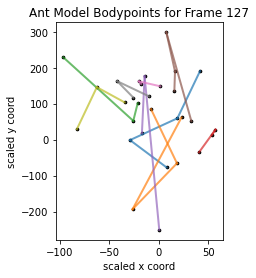

In [35]:
ant_model_save(bp_data['01SSmidfr_antmovie201010190036'], skeleton, skeleton_color, fr=127, title="bp_error4")


In [101]:
for key,value in dist_dic.items():
    inf_frames = []
    for frame,dist in enumerate(value):
        if np.isinf(dist):
            inf_frames.append(frame)
            #print(f"{key}: frame: {frame}")
    if inf_frames != []:
        print(f"{key}: frames {inf_frames}")
        print()

04Ydmidfd_antmovie200924205857: frames [3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462]

04Tdminfr_antmovie200927202259: frames [4815, 4816, 4817, 4818, 4819, 4820, 4821, 4822, 4823, 4824, 11014]

01Bdmidfr_antmovie200926195414: frames [9453, 9610, 9611]

01BWmidfd_antmovie200929190558: frames [1260, 1261, 1262, 1263, 1264, 1265, 1266, 19631, 19632, 19633, 19634, 19635, 19636]

13RGmajfd_antmovie200927225925: frames [14983, 14984, 14985, 14986, 14987, 14988, 15058, 15059, 15060, 15061, 15062, 15063, 15064]

06GRmidfr_antmovie201010210607: frames [14440, 14441, 14442, 14443, 14444, 14445, 14446, 14447, 14448, 14449, 14450]

06WRmajfd_antmovie200929211318: frames [4450, 4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469]

01Pdminfd_antmovie200927193143: frames [17220, 17221, 17222, 17223, 17224, 17225, 17226, 17227, 17228, 17229, 17230, 17231, 17232, 17233, 17234, 17235, 17236, 17237, 17238, 17239, 17240, 17241, 17242, 1